<a id=toc></a>
## Hybrid Network Intrusion Detection System

## Objective
The Objective of this notebook is to Make a Classification Model that accurately classify the given data points 


## Dataset
The dataset used in this notebook is the '<b> UNSW_NB15 - Dataset 
<br>

<hr>

## Table of contents

- [1 | Importing Required Libraries & DataSource](#1)
   > - [Performance monitoring](#1.1)
   > - [Load and Inspect Dataset](#1.2)
   > - [Understanding About features](#1.3)
   > - [Concatenating the Data ](#1.4)

- [2 | Data Analysis and basic preprocessing](#2)
   > - [Computing Dimension of Dataset](#2.1)
   > - [Statistical Summary of Dataset](#2.2)
   > - [Checking if There's Any Duplicate Records](#2.3)
   > - [Computing Total No. of Missing Values and the Percentage of Missing Values](#2.4)
   > - [Performing Descriptive Analysis](#2.5)
   > - [Performing Descriptive Analysis on Categorical Attributes](#2.6)
   > - [Checking Unique Class of Categorical Attributes](#2.7)
   
   
- [3 | Exploratory Data Analysis](#3)
   > - [Checking for outliers](#3.1)
   > - [Visualising Data Distribution and Skewness](#3.2)
   > - [Visualising Class Distribution](#3.3)
   
   
- [4 | Preprocessing](#4)
   > - [Feature Engineering](#4.1)
   > - [Encode leftover categorical features](#4.2)
   > - [Checking Highly Correlated Features](#4.3)
   > - [Splitting the features in dependent and independent features](#4.4)
   > - [Applying SMOTE to balance the unbalanced data](#4.5)
   > - [Checking Feature Importance](#4.6)
   > - [Dividing in train-test split + Scaling and PCA variance](#4.9)
 
- [5 | Model Building](#5)
   > - [Decision Tree Model](#5.1)
   > - [Random Forest Model](#5.2)
   > - [Gradient Boosting Model](#5.3)
   > - [Logistic Regression Model](#5.4)
   > - [KNeighbors Classifier model](#5.5)
   > - [Extra Trees Model](#5.6)
   > - [SVM model (SGDClassifier)](#5.7)
   > - [SVM model (SVC)](#5.8)
   > - [SVM model (OneClassSVM) - Unsupervised](#5.9)
   > - [Summary and Classifier Ensemble](#5.10)

- [6 | Final Metrics](#6)
   
- [7 | Keras Models](#7)
   > - [Neural Network MLP (Keras)](#7.1)
   > - [GRU (Keras)](#7.2)
   > - [LSTM (Keras)](#7.3)

- [8 | Evaluation with Keras Models](#8)

- [9 | End of Performance Monitoring](#9)



<a id='1'></a>
# 1 | Importing Required Libraries & DataSource


<a id='1.1'></a>
# Performance monitoring

This counts the entire pre/post-processing and train-evalutation period.

In [1]:
import time
import psutil

# Record the start time and initial system statistics
notebook_start_time = time.time()
process = psutil.Process()

start_cpu_times = psutil.cpu_times()
start_memory_info = process.memory_info()
start_disk_io = psutil.disk_io_counters()
start_net_io = psutil.net_io_counters()

In [2]:
# Libraries for Data Manipulation
import pandas as pd
import numpy as np

import gc
import os
import poplib
# Libraries for Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import altair as alt
from scipy.stats import skew
sns.set_theme(style="white", font_scale=1.5)
sns.set_theme(rc={"axes.facecolor":"#FFFAF0", "figure.facecolor":"#FFFAF0"})
sns.set_context("poster", font_scale=.7)
import matplotlib.ticker as ticker

# Libraries to Handle Warnings
import warnings
warnings.filterwarnings('ignore')

# Libraries for Statistical Analysis
from scipy import stats
from scipy.stats import chi2, chi2_contingency

# Setting Display Options
pd.set_option("display.max.columns", None)

# Machine Learning Algorithms
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import mutual_info_regression
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import joblib
from joblib import dump


import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout,LeakyReLU
from tensorflow.keras.initializers import HeNormal
from tensorflow.keras.regularizers import l1,l2
from tensorflow.keras.optimizers import SGD,Adam
import keras_tuner
import keras


# Model Evaluation Metrics
from sklearn.metrics import (
    accuracy_score,
    recall_score,
    precision_score,
    f1_score,silhouette_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    roc_curve,
    mean_absolute_error
)

# Data Source
# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))


<a id='1.2'></a>
# Load and Inspect Dataset

In [3]:
testing_set = pd.read_csv('kaggle/input/unsw-nb15/UNSW_NB15_testing-set.csv')
training_set = pd.read_csv('kaggle/input/unsw-nb15/UNSW_NB15_training-set.csv')
LIST_EVENTS = pd.read_csv('kaggle/input/unsw-nb15/UNSW-NB15_LIST_EVENTS.csv')
NB15_1 = pd.read_csv('kaggle/input/unsw-nb15/UNSW-NB15_1.csv')
NB15_2 = pd.read_csv('kaggle/input/unsw-nb15/UNSW-NB15_2.csv')
NB15_3 = pd.read_csv('kaggle/input/unsw-nb15/UNSW-NB15_3.csv')
NB15_4 = pd.read_csv('kaggle/input/unsw-nb15/UNSW-NB15_4.csv')
NB15_features = pd.read_csv('kaggle/input/unsw-nb15/NUSW-NB15_features.csv', encoding='cp1252')

In [4]:
testing_set.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,252,254,14158.942380,8495.365234,0,0,24.295600,8.375000,30.177547,11.830604,255,621772692,2202533631,255,0.000000,0.000000,0.000000,43,43,0,0,1,0,1,1,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,62,252,8395.112305,503571.312500,2,17,49.915000,15.432865,61.426934,1387.778330,255,1417884146,3077387971,255,0.000000,0.000000,0.000000,52,1106,0,0,43,1,1,1,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,62,252,1572.271851,60929.230470,1,6,231.875571,102.737203,17179.586860,11420.926230,255,2116150707,2963114973,255,0.111897,0.061458,0.050439,46,824,0,0,7,1,2,1,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,62,252,2740.178955,3358.622070,1,3,152.876547,90.235726,259.080172,4991.784669,255,1107119177,1047442890,255,0.000000,0.000000,0.000000,52,64,0,0,1,1,2,1,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,254,252,8561.499023,3987.059814,2,1,47.750333,75.659602,2415.837634,115.807000,255,2436137549,1977154190,255,0.128381,0.071147,0.057234,53,45,0,0,43,1,2,2,1,40,0,0,0,2,39,0,Normal,0


In [5]:
training_set.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,254,0,180363632.0,0.0,0,0,0.011,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,248,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,254,0,881000000.0,0.0,0,0,0.008,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,881,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,254,0,854400000.0,0.0,0,0,0.005,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,534,0,0,0,3,2,1,1,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.6608,254,0,600000000.0,0.0,0,0,0.006,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,450,0,0,0,3,2,2,2,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,254,0,850400000.0,0.0,0,0,0.010,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,1063,0,0,0,3,2,2,2,1,3,0,0,0,2,3,0,Normal,0


In [6]:
LIST_EVENTS.head()

,Attack category,Attack subcategory,Number of events
0,normal,NaN,2218761
1,Fuzzers,FTP,558
2,Fuzzers,HTTP,1497
3,Fuzzers,RIP,3550
4,Fuzzers,SMB,5245


In [7]:
NB15_1.head()

,59.166.0.0,1390,149.171.126.6,53,udp,CON,0.001055,132,164,31,29,0,0.1,dns,500473.9375,621800.9375,2,2.1,0.2,0.3,0.4,0.5,66,82,0.6,0.7,0.8,0.9,1421927414,1421927414.1,0.017,0.013,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,3,7,1,3.1,1.1,1.2,1.3,Unnamed: 47,0.18
0,59.166.0.0,33661,149.171.126.9,1024,udp,CON,0.036133,528,304,31,29,0,0,-,87676.08594,50480.17188,4,4,0,0,0,0,132,76,0,0,9.891010,10.682733,1421927414,1421927414,7.005,7.564333,0.0,0.0,0.0,0,0,0,0,0,2,4,2,3,1,1,2,NaN,0
1,59.166.0.6,1464,149.171.126.7,53,udp,CON,0.001119,146,178,31,29,0,0,dns,521894.53130,636282.37500,2,2,0,0,0,0,73,89,0,0,0.000000,0.000000,1421927414,1421927414,0.017,0.013000,0.0,0.0,0.0,0,0,0,0,0,12,8,1,2,2,1,1,NaN,0
2,59.166.0.5,3593,149.171.126.5,53,udp,CON,0.001209,132,164,31,29,0,0,dns,436724.56250,542597.18750,2,2,0,0,0,0,66,82,0,0,0.000000,0.000000,1421927414,1421927414,0.043,0.014000,0.0,0.0,0.0,0,0,0,0,0,6,9,1,1,1,1,1,NaN,0
3,59.166.0.3,49664,149.171.126.0,53,udp,CON,0.001169,146,178,31,29,0,0,dns,499572.25000,609067.56250,2,2,0,0,0,0,73,89,0,0,0.000000,0.000000,1421927414,1421927414,0.005,0.003000,0.0,0.0,0.0,0,0,0,0,0,7,9,1,1,1,1,1,NaN,0
4,59.166.0.0,32119,149.171.126.9,111,udp,CON,0.078339,568,312,31,29,0,0,-,43503.23438,23896.14258,4,4,0,0,0,0,142,78,0,0,29.682221,34.370340,1421927414,1421927414,21.003,24.315000,0.0,0.0,0.0,0,0,0,0,0,2,4,2,3,1,1,2,NaN,0


In [8]:
NB15_2.head()

,59.166.0.0,6055,149.171.126.5,54145,tcp,FIN,0.072974,4238,60788,31,29,7,30,-,458245.4375,6571546.5,72,72.1,255,255.1,1003293149,1003585034,59,844,0,0.1,62.04531,61.899776,1421955842,1421955842.1,1.02269,0.997042,0.002317,0.002173,0.000144,0.2,0.3,0.4,0.5,0.6,13,13.1,6,7.1,1,1.1,2,Unnamed: 47,0.7
0,59.166.0.0,7832,149.171.126.3,5607,tcp,FIN,0.144951,5174,91072,31,29,7,39,-,2.824127e+05,4.971776e+06,90,92,255,255,3152877672,1047439924,57,990,0,0,98.166675,97.062913,1421955842,1421955842,1.624562,1.587374,0.000665,0.000497,0.000168,0,0,0.0,0.0,0,13,13,6,7,1,1,2,NaN,0
1,59.166.0.8,11397,149.171.126.6,21,tcp,FIN,0.116107,2934,3742,31,29,11,15,ftp,1.982998e+05,2.530769e+05,52,54,255,255,3208685093,3215278370,56,69,0,0,194.564141,4.796288,1421955842,1421955842,2.314660,2.149906,0.002342,0.002151,0.000191,0,0,0.0,1.0,1,1,2,7,5,1,1,4,NaN,0
2,59.166.0.0,3804,149.171.126.3,53,udp,CON,0.000986,146,178,31,29,0,0,-,5.922921e+05,7.221095e+05,2,2,0,0,0,0,73,89,0,0,0.000000,0.000000,1421955842,1421955842,0.011000,0.009000,0.000000,0.000000,0.000000,0,0,0.0,0.0,0,13,13,6,7,1,1,2,NaN,0
3,59.166.0.8,14339,149.171.126.6,14724,tcp,FIN,0.038480,8928,320,31,29,4,1,-,1.723701e+06,5.550936e+04,14,6,255,255,1063301791,1113098865,638,53,0,0,245.278645,11.454426,1421955842,1421955842,2.960000,6.054000,0.008268,0.008075,0.000193,0,0,0.0,0.0,0,8,20,7,5,1,1,4,NaN,0
4,59.166.0.8,39094,149.171.126.3,53,udp,CON,0.001026,130,162,31,29,0,0,-,5.068226e+05,6.315789e+05,2,2,0,0,0,0,65,81,0,0,0.000000,0.000000,1421955842,1421955842,0.010000,0.002000,0.000000,0.000000,0.000000,0,0,0.0,0.0,0,8,13,6,5,1,1,1,NaN,0


In [9]:
NB15_3.head()

,59.166.0.1,18247,149.171.126.4,7662,tcp,FIN,0.119596,4550,68342,31,29,7,33,-,300478.2813,4514398.5,78,80,255,255.1,1818376620,1818657356,58,854,0,0.1,87.137592,85.643619,1424231129,1424231129.1,1.549156,1.50719,0.000644,0.000521,0.000123,0.2,0.3,Unnamed: 37,Unnamed: 38,,6,2,2.1,5,1,1.1,2.2,Unnamed: 47,0.4
0,59.166.0.3,54771,149.171.126.2,27709,tcp,FIN,0.650574,8928,320,31,29,4,1,ftp-data,1.019530e+05,3.283254e+03,14,6,255,255,4075447467,3777413974,638,53,0,0,4045.664812,162.187656,1424231129,1424231129,50.044153,129.990797,0.000616,0.000495,0.000121,0,0,NaN,NaN,,3,5,2,4,1,1,4,NaN,0
1,59.166.0.8,13289,149.171.126.9,5190,tcp,FIN,0.007980,2158,2464,31,29,6,6,-,2.074185e+06,2.367920e+06,24,24,255,255,1638377249,1638673555,90,103,0,0,23.013883,0.487342,1424231129,1424231129,0.347545,0.322913,0.000668,0.000544,0.000124,0,0,NaN,NaN,,3,5,1,1,1,1,3,NaN,0
2,149.171.126.18,1043,175.45.176.3,53,udp,INT,0.000005,264,0,60,0,0,0,dns,2.112000e+08,0.000000e+00,2,0,0,0,0,0,132,0,0,0,0.000000,0.000000,1424231129,1424231129,0.005000,0.000000,0.000000,0.000000,0.000000,0,0,NaN,NaN,,19,19,19,19,19,19,19,NaN,0
3,149.171.126.18,1043,175.45.176.3,53,udp,INT,0.000005,264,0,60,0,0,0,dns,2.112000e+08,0.000000e+00,2,0,0,0,0,0,132,0,0,0,0.000000,0.000000,1424231129,1424231129,0.005000,0.000000,0.000000,0.000000,0.000000,0,0,NaN,NaN,,19,19,19,19,19,19,19,NaN,0
4,59.166.0.3,10275,149.171.126.0,25,tcp,FIN,0.486578,37462,3380,31,29,18,8,smtp,6.040882e+05,5.425646e+04,52,42,255,255,1518379503,3670369209,720,80,0,0,768.061343,24.935787,1424231128,1424231129,9.533961,11.645000,0.016012,0.009132,0.006880,0,0,NaN,NaN,,3,2,3,4,2,1,2,NaN,0


In [10]:
NB15_4.head()

,59.166.0.9,7045,149.171.126.7,25,tcp,FIN,0.201886,37552,3380,31,29,18,8,smtp,1459437.5,130766.8672,52,42,255,255.1,1422136554,3572668484,722,80,0,0.1,456.043567,15.530109,1424250009,1424250009.1,3.943843,4.912488,0.00059,0.000473,0.000117,0.2,0.3,Unnamed: 37,Unnamed: 38,,2,2.1,7,4,1,1.1,3,Unnamed: 47,0.4
0,59.166.0.9,9685,149.171.126.2,80,tcp,FIN,5.864748,19410,1087890,31,29,2,370,http,2.640454e+04,1.481983e+06,364,746,255,255,389619597,394688654,53,1458,1,0,1031.366423,690.219581,1424250003,1424250009,16.155447,7.871279,0.000771,0.000638,0.000133,0,0,1.0,NaN,,3,1,4,4,1,1,1,NaN,0
1,59.166.0.2,1421,149.171.126.4,53,udp,CON,0.001391,146,178,31,29,0,0,dns,4.198418e+05,5.118620e+05,2,2,0,0,0,0,73,89,0,0,0.000000,0.000000,1424250009,1424250009,0.009000,0.002000,0.000000,0.000000,0.000000,0,0,NaN,NaN,,3,5,2,7,1,1,4,NaN,0
2,59.166.0.2,21553,149.171.126.2,25,tcp,FIN,0.053948,37812,3380,31,29,19,8,smtp,5.503374e+06,4.893601e+05,54,42,255,255,4047523379,1903327524,700,80,0,0,65.909688,3.155258,1424250009,1424250009,1.011547,1.302561,0.000674,0.000540,0.000134,0,0,NaN,NaN,,1,1,4,7,1,1,3,NaN,0
3,59.166.0.8,45212,149.171.126.4,53,udp,CON,0.000953,146,178,31,29,0,0,dns,6.128017e+05,7.471144e+05,2,2,0,0,0,0,73,89,0,0,0.000000,0.000000,1424250009,1424250009,0.009000,0.004000,0.000000,0.000000,0.000000,0,0,NaN,NaN,,2,5,2,1,1,1,2,NaN,0
4,59.166.0.0,59922,149.171.126.8,6881,tcp,FIN,8.633186,25056,1094788,31,29,38,390,-,2.316642e+04,1.013311e+06,446,858,255,255,497111133,526810925,56,1276,0,0,7751.702640,5572.343447,1424250000,1424250009,19.443407,10.084887,0.000654,0.000516,0.000138,0,0,NaN,NaN,,9,7,2,3,2,1,6,NaN,0


<a id='1.3'></a>
# Understanding About features



In [11]:
NB15_features

,No.,Name,Type,Description
0,1,srcip,nominal,Source IP address
1,2,sport,integer,Source port number
2,3,dstip,nominal,Destination IP address
3,4,dsport,integer,Destination port number
4,5,proto,nominal,Transaction protocol
5,6,state,nominal,Indicates to the state and its dependent proto...
6,7,dur,Float,Record total duration
7,8,sbytes,Integer,Source to destination transaction bytes
8,9,dbytes,Integer,Destination to source transaction bytes
9,10,sttl,Integer,Source to destination time to live value


<a id='1.4'></a>
# Concating the Data 


In [12]:
NB15_1.columns = NB15_features['Name'] 
NB15_2.columns = NB15_features['Name'] 
NB15_3.columns = NB15_features['Name'] 
NB15_4.columns = NB15_features['Name'] 

In [13]:
train_df = pd.concat([NB15_1, NB15_2, NB15_3, NB15_4], ignore_index=True)
train_df = train_df.rename(columns={'ct_src_ ltm': 'ct_src_ltm'})


In [14]:
# Shuffle the data points in train_df
train_df = train_df.sample(frac=1, random_state=42).reset_index(drop=True)

In [15]:
train_df

Name,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,service,Sload,Dload,Spkts,Dpkts,swin,dwin,stcpb,dtcpb,smeansz,dmeansz,trans_depth,res_bdy_len,Sjit,Djit,Stime,Ltime,Sintpkt,Dintpkt,tcprtt,synack,ackdat,is_sm_ips_ports,ct_state_ttl,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label
0,175.45.176.3,57672,149.171.126.15,3260,tcp,CON,0.285356,986,86,62,252,2,1,-,2.304490e+04,1.205512e+03,6,2,255,255,761934099,3893365633,164,43,0,0,3661.562382,0.000000,1424224369,1424224369,57.071200,0.002000,0.257434,0.182930,0.074504,0,3,NaN,NaN,,10,8,4,5,3,1,7,NaN,0
1,59.166.0.8,38052,149.171.126.9,6881,tcp,FIN,0.314311,1540,1644,31,29,4,4,-,3.675341e+04,3.952773e+04,16,18,255,255,734569334,2907227880,96,91,0,0,1385.623880,35.106383,1424252728,1424252728,20.925067,18.459766,0.000596,0.000494,0.000102,0,0,NaN,NaN,,14,6,8,12,5,1,6,NaN,0
2,59.166.0.0,42911,149.171.126.2,38558,udp,CON,0.301180,536,304,31,29,0,0,-,1.067800e+04,6.056179e+03,4,4,0,0,0,0,134,76,0,0,116.927883,123.543578,1421934312,1421934313,82.683000,87.363000,0.000000,0.000000,0.000000,0,0,0.0,0.0,0,9,16,7,6,1,1,3,NaN,0
3,175.45.176.1,47439,149.171.126.14,53,udp,INT,0.000009,114,0,254,0,0,0,dns,5.066666e+07,0.000000e+00,2,0,0,0,0,0,57,0,0,0,0.000000,0.000000,1424252582,1424252582,0.009000,0.000000,0.000000,0.000000,0.000000,0,2,NaN,NaN,,33,33,17,17,17,17,33,Generic,1
4,59.166.0.5,61544,149.171.126.6,53,udp,CON,0.001079,146,178,31,29,0,0,dns,5.412419e+05,6.598702e+05,2,2,0,0,0,0,73,89,0,0,0.000000,0.000000,1424243836,1424243836,0.009000,0.007000,0.000000,0.000000,0.000000,0,0,NaN,NaN,,2,2,5,4,1,1,1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2540038,59.166.0.8,34415,149.171.126.0,5190,tcp,FIN,0.008119,1920,4312,31,29,6,6,-,1.806134e+06,4.072423e+06,22,24,255,255,2097393639,4247267529,87,180,0,0,24.265009,21.052982,1421931570,1421931570,0.369952,0.328696,0.000680,0.000548,0.000132,0,0,0.0,0.0,0,3,10,4,1,1,1,1,NaN,0
2540039,59.166.0.8,56352,149.171.126.2,53,udp,CON,0.001047,130,162,31,29,0,0,dns,4.966571e+05,6.189111e+05,2,2,0,0,0,0,65,81,0,0,0.000000,0.000000,1424238783,1424238783,0.009000,0.007000,0.000000,0.000000,0.000000,0,0,NaN,NaN,,1,1,2,6,1,1,1,NaN,0
2540040,59.166.0.9,25527,149.171.126.4,6881,tcp,FIN,0.013106,1540,1644,31,29,4,4,-,8.814284e+05,9.479628e+05,16,18,255,255,1097293365,3252878568,96,91,0,0,59.343892,1.359939,1424257156,1424257156,0.852800,0.744353,0.000564,0.000449,0.000115,0,0,NaN,NaN,,12,11,8,9,6,1,6,NaN,0
2540041,175.45.176.1,47439,149.171.126.14,53,udp,INT,0.000003,114,0,254,0,0,0,dns,1.520000e+08,0.000000e+00,2,0,0,0,0,0,57,0,0,0,0.000000,0.000000,1424253397,1424253397,0.003000,0.000000,0.000000,0.000000,0.000000,0,2,NaN,NaN,,37,37,26,26,26,13,37,Generic,1


In [16]:
# Save the shuffled DataFrame to a new CSV file
train_df.to_csv('rawdataset.csv', index=False)

In [17]:
list_drop = ['attack_cat','srcip', 'dstip']
train_df.drop(list_drop,axis=1,inplace=True)

# test_list_drop = ['id','attack_cat']
# testing_set.drop(test_list_drop,axis=1,inplace=True)

# testing_set.rename(columns={'label': 'Label'}, inplace=True)


In [18]:
train_df

Name,sport,dsport,proto,state,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,service,Sload,Dload,Spkts,Dpkts,swin,dwin,stcpb,dtcpb,smeansz,dmeansz,trans_depth,res_bdy_len,Sjit,Djit,Stime,Ltime,Sintpkt,Dintpkt,tcprtt,synack,ackdat,is_sm_ips_ports,ct_state_ttl,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,Label
0,57672,3260,tcp,CON,0.285356,986,86,62,252,2,1,-,2.304490e+04,1.205512e+03,6,2,255,255,761934099,3893365633,164,43,0,0,3661.562382,0.000000,1424224369,1424224369,57.071200,0.002000,0.257434,0.182930,0.074504,0,3,NaN,NaN,,10,8,4,5,3,1,7,0
1,38052,6881,tcp,FIN,0.314311,1540,1644,31,29,4,4,-,3.675341e+04,3.952773e+04,16,18,255,255,734569334,2907227880,96,91,0,0,1385.623880,35.106383,1424252728,1424252728,20.925067,18.459766,0.000596,0.000494,0.000102,0,0,NaN,NaN,,14,6,8,12,5,1,6,0
2,42911,38558,udp,CON,0.301180,536,304,31,29,0,0,-,1.067800e+04,6.056179e+03,4,4,0,0,0,0,134,76,0,0,116.927883,123.543578,1421934312,1421934313,82.683000,87.363000,0.000000,0.000000,0.000000,0,0,0.0,0.0,0,9,16,7,6,1,1,3,0
3,47439,53,udp,INT,0.000009,114,0,254,0,0,0,dns,5.066666e+07,0.000000e+00,2,0,0,0,0,0,57,0,0,0,0.000000,0.000000,1424252582,1424252582,0.009000,0.000000,0.000000,0.000000,0.000000,0,2,NaN,NaN,,33,33,17,17,17,17,33,1
4,61544,53,udp,CON,0.001079,146,178,31,29,0,0,dns,5.412419e+05,6.598702e+05,2,2,0,0,0,0,73,89,0,0,0.000000,0.000000,1424243836,1424243836,0.009000,0.007000,0.000000,0.000000,0.000000,0,0,NaN,NaN,,2,2,5,4,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2540038,34415,5190,tcp,FIN,0.008119,1920,4312,31,29,6,6,-,1.806134e+06,4.072423e+06,22,24,255,255,2097393639,4247267529,87,180,0,0,24.265009,21.052982,1421931570,1421931570,0.369952,0.328696,0.000680,0.000548,0.000132,0,0,0.0,0.0,0,3,10,4,1,1,1,1,0
2540039,56352,53,udp,CON,0.001047,130,162,31,29,0,0,dns,4.966571e+05,6.189111e+05,2,2,0,0,0,0,65,81,0,0,0.000000,0.000000,1424238783,1424238783,0.009000,0.007000,0.000000,0.000000,0.000000,0,0,NaN,NaN,,1,1,2,6,1,1,1,0
2540040,25527,6881,tcp,FIN,0.013106,1540,1644,31,29,4,4,-,8.814284e+05,9.479628e+05,16,18,255,255,1097293365,3252878568,96,91,0,0,59.343892,1.359939,1424257156,1424257156,0.852800,0.744353,0.000564,0.000449,0.000115,0,0,NaN,NaN,,12,11,8,9,6,1,6,0
2540041,47439,53,udp,INT,0.000003,114,0,254,0,0,0,dns,1.520000e+08,0.000000e+00,2,0,0,0,0,0,57,0,0,0,0.000000,0.000000,1424253397,1424253397,0.003000,0.000000,0.000000,0.000000,0.000000,0,2,NaN,NaN,,37,37,26,26,26,13,37,1


<a id='2'></a>
# 2 | Data Analysis and Basic preprocessing 


<a id='2.1'></a>
## Computing Dimension of Dataset

In [19]:
print("dataset shape: ",train_df.shape)

dataset shape:  (2540043, 46)


<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown> 🔍 Inference:</font></h3>

* There is total **2540043 records** and **49 columns** availabe in the train_dataset.

<a id='2.2'></a>
## Statistical Summary of Dataset

In [20]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2540043 entries, 0 to 2540042
Data columns (total 46 columns):
 #   Column            Dtype  
---  ------            -----  
 0   sport             object 
 1   dsport            object 
 2   proto             object 
 3   state             object 
 4   dur               float64
 5   sbytes            int64  
 6   dbytes            int64  
 7   sttl              int64  
 8   dttl              int64  
 9   sloss             int64  
 10  dloss             int64  
 11  service           object 
 12  Sload             float64
 13  Dload             float64
 14  Spkts             int64  
 15  Dpkts             int64  
 16  swin              int64  
 17  dwin              int64  
 18  stcpb             int64  
 19  dtcpb             int64  
 20  smeansz           int64  
 21  dmeansz           int64  
 22  trans_depth       int64  
 23  res_bdy_len       int64  
 24  Sjit              float64
 25  Djit              float64
 26  Stime         

In [21]:
# Identify the data types of columns
column_data_types = train_df.dtypes

# Count the numerical and categorical columns
numerical_count = 0
categorical_count = 0

for column_name, data_type in column_data_types.items():
    if np.issubdtype(data_type, np.number):
        numerical_count += 1
    else:
        categorical_count += 1

# Print the counts
print(f"There are {numerical_count} Numerical Columns in dataset")
print(f"There are {categorical_count} Categorical Columns in dataset")

There are 40 Numerical Columns in dataset
There are 6 Categorical Columns in dataset


<a id='2.3'></a>
## Checking if There's Any Duplicate Records

In [22]:
print("Duplicates in train_df: ",train_df.duplicated().sum())

Duplicates in train_df:  491849


In [23]:
train_df = train_df.drop_duplicates()

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown> 🔍 Inference:</font></h3>

* There are 480626 duplicate records present in the dataset.

<a id='2.4'></a>
## Computing Total No. of Missing Values and the Percentage of Missing Values

In [24]:
missing_data = train_df.isnull().sum().to_frame().rename(columns={0:"Total No. of Missing Values"})
missing_data["% of Missing Values"] = round((missing_data["Total No. of Missing Values"]/len(train_df))*100,2)
missing_data

,Total No. of Missing Values,% of Missing Values
Name,,
sport,0,0.00
dsport,0,0.00
proto,0,0.00
state,0,0.00
dur,0,0.00
sbytes,0,0.00
dbytes,0,0.00
sttl,0,0.00
dttl,0,0.00


### Handling Null values here because it create wrong inference in EDA

In [25]:
# # NaN values implies that no attack are there for that particular row data, Replace NaN values in the 'attack_cat' column with 'not attacked'
# train_df['attack_cat'].fillna('normal',inplace = True)
# train_df['attack_cat'] = train_df['attack_cat'].apply(lambda x: x.strip().lower())

# missing values imply that there were no flows with HTTP methods in certain instances so we will replace the NAN with 0 
train_df['ct_flw_http_mthd'].fillna(0, inplace=True)

# is_ftp_login is of type binary that mean it takes 1(user has loged in) or 0 (or not) so the best approch is to replace nan with 0
train_df['is_ftp_login'].fillna(0, inplace=True)

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown> 🔍 Inference:</font></h3>

* ct_flw_http_mthd,is_ftp_login and attack_cat of the Attribute are having Missing Values we handle it later.  

<a id='2.5'></a>
## Performing Descriptive Analysis

In [26]:
round(train_df.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
Name,,,,,,,,
dur,2048194.0,6.400000e-01,1.105000e+01,0.000000e+00,0.000000e+00,3.000000e-02,3.400000e-01,8.786640e+03
sbytes,2048194.0,5.115540e+03,6.227923e+04,0.000000e+00,4.240000e+02,1.684000e+03,3.728000e+03,1.435577e+07
dbytes,2048194.0,4.214292e+04,1.700893e+05,0.000000e+00,3.040000e+02,3.080000e+03,2.011600e+04,1.465753e+07
sttl,2048194.0,4.252000e+01,4.834000e+01,0.000000e+00,3.100000e+01,3.100000e+01,3.100000e+01,2.550000e+02
dttl,2048194.0,3.666000e+01,4.367000e+01,0.000000e+00,2.900000e+01,2.900000e+01,2.900000e+01,2.540000e+02
sloss,2048194.0,6.150000e+00,2.463000e+01,0.000000e+00,0.000000e+00,4.000000e+00,7.000000e+00,5.319000e+03
dloss,2048194.0,1.903000e+01,5.959000e+01,0.000000e+00,0.000000e+00,5.000000e+00,1.500000e+01,5.507000e+03
Sload,2048194.0,8.335933e+06,7.207406e+07,0.000000e+00,8.036232e+04,5.399792e+05,1.080689e+06,5.988000e+09
Dload,2048194.0,2.970461e+06,4.487254e+06,0.000000e+00,7.638325e+04,6.704331e+05,3.849490e+06,1.287619e+08


<a id='2.6'></a>
## Performing Descriptive Analysis on Categorical Attributes.

In [27]:
train_df.describe(include="O").T

,count,unique,top,freq
Name,,,,
sport,2048194,100343,1043,18503
dsport,2048194,128297,53,233820
proto,2048194,135,tcp,1448579
state,2048194,16,FIN,1433230
service,2048194,13,-,1158268
ct_ftp_cmd,2048194,13,,1004211


<a id='2.7'></a>
## Checking Unique Values of Attributes

In [28]:
cols = train_df.columns

for column in cols:
    print('Unique values of ',column , 'with dtype',train_df[column].dtype, 'have total values',train_df[column].nunique(),'->',  train_df[column].unique())
    print('-'*100)

Unique values of  sport with dtype object have total values 100343 -> [57672 38052 42911 ... '17953' '20349' '53235']
----------------------------------------------------------------------------------------------------
Unique values of  dsport with dtype object have total values 128297 -> ['3260' '6881' 38558 ... 62291 28427 38903]
----------------------------------------------------------------------------------------------------
Unique values of  proto with dtype object have total values 135 -> ['tcp' 'udp' 'arp' 'ptp' 'unas' 'ip' 'vrrp' 'pnni' '3pc' 'sun-nd' 'wsn'
 'ospf' 'st2' 'kryptolan' 'sctp' 'pvp' 'fc' 'wb-expak' 'secure-vmtp'
 'ipv6-no' 'mhrp' 'xtp' 'hmp' 'idpr-cmtp' 'merit-inp' 'icmp' 'pim' 'any'
 'cbt' 'crudp' 'ipcv' 'larp' 'sm' 'iatp' 'iso-ip' 'rsvp' 'ddx' 'chaos'
 'tp++' 'mobile' 'cftp' 'ttp' 'sprite-rpc' 'aes-sp3-d' 'aris' 'sep'
 'encap' 'dcn' 'igmp' 'isis' 'leaf-2' 'ipnip' 'argus' 'compaq-peer' 'vmtp'
 'ipv6-route' 'egp' 'uti' 'zero' 'tlsp' 'wb-mon' 'sdrp' 'swipe' 'tcf'


<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown> 🔍 Inference:</font></h3>

* Observed that some values are repeated due to their wrong format , for example in column 'ct_ftp_cmd' the unique values are [0 ' ' '1' 1 '0' 2 8 '2' 4 5 3 6 '4'] in which we see that same values reapeated and treated as differently
* In column 'is_ftp_login' unique values are [0. 1. 2. 4.] which is not correct because according to given NB15_features.csv this column is a binary column

### Handling ct_ftp_cmd

In [29]:
# Function to clean and convert to numeric
def clean_and_convert_ct_ftp_cmd(df, column):
    df[column] = df[column].astype('str').replace(' ', '0')
    df[column] = pd.to_numeric(df[column], errors='coerce').fillna(0).astype('int64')
    return df

In [30]:
# Apply to 'ct_ftp_cmd'
train_df = clean_and_convert_ct_ftp_cmd(train_df, 'ct_ftp_cmd')

In [31]:
# Verify
print(f"Unique values of 'ct_ftp_cmd' after processing:", train_df['ct_ftp_cmd'].unique())

Unique values of 'ct_ftp_cmd' after processing: [0 1 2 4 5 3 6 8]


### Handling is_ftp_login

In [32]:
# Function to ensure binary column
def convert_to_binary(df, column):
    df[column] = pd.to_numeric(df[column], errors='coerce').fillna(0).astype('int64')
    df[column] = (df[column] > 0).astype('int64')
    return df

In [33]:
# Apply to 'is_ftp_login'
train_df = convert_to_binary(train_df, 'is_ftp_login')

In [34]:
# Verify
print(f"Unique values of 'is_ftp_login' after processing:", train_df['is_ftp_login'].unique())

Unique values of 'is_ftp_login' after processing: [0 1]


### Handling sport and dsport

In [35]:
# Function to convert to numeric and handle NaNs
def convert_sport_dsport(df, column):
    df[column] = df[column].astype('str')
    df[column] = pd.to_numeric(df[column], errors='coerce').fillna(0).astype('int64')
    return df

In [36]:
# Apply to 'sport' and 'dsport'
train_df = convert_sport_dsport(train_df, 'sport')
train_df = convert_sport_dsport(train_df, 'dsport')

In [37]:
# Verify
print(f"Unique values of 'sport' after processing:", train_df['sport'].unique())
print(f"Unique values of 'dsport' after processing:", train_df['dsport'].unique())

Unique values of 'sport' after processing: [57672 38052 42911 ...   922    19    74]
Unique values of 'dsport' after processing: [ 3260  6881 38558 ... 36581 59554  9856]


In [38]:
# Re-check if 'sport' and 'dport' are numerical
if train_df['sport'].dtype in ['int64', 'float64']:
    print("'sport' column is numerical.")
else:
    print("'sport' column is not numerical.")

if train_df['dsport'].dtype in ['int64', 'float64']:
    print("'dsport' column is numerical.")
else:
    print("'dsport' column is not numerical.")

'sport' column is numerical.
'dsport' column is numerical.


In [39]:
print(f"Unique values of 'Label':", train_df['Label'].unique())

Unique values of 'Label': [0 1]


<a id='3'></a>
# 3 | Exploratory Data Analysis (EDA)


<a id='3.1'></a>
## Checking for outliers

In [40]:
numerical_columns = train_df.select_dtypes(include=['float64', 'int64']).columns.tolist()
len(numerical_columns)

43

In [41]:
# Print all numerical columns to verify
print("Numerical columns:", numerical_columns)

Numerical columns: ['sport', 'dsport', 'dur', 'sbytes', 'dbytes', 'sttl', 'dttl', 'sloss', 'dloss', 'Sload', 'Dload', 'Spkts', 'Dpkts', 'swin', 'dwin', 'stcpb', 'dtcpb', 'smeansz', 'dmeansz', 'trans_depth', 'res_bdy_len', 'Sjit', 'Djit', 'Stime', 'Ltime', 'Sintpkt', 'Dintpkt', 'tcprtt', 'synack', 'ackdat', 'is_sm_ips_ports', 'ct_state_ttl', 'ct_flw_http_mthd', 'is_ftp_login', 'ct_ftp_cmd', 'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'Label']


In [42]:
# Check the data types of all columns in your notebook
print(train_df.dtypes)

# List all columns to compare with the other notebook
all_columns = train_df.columns.tolist()
print("All columns in your notebook:", all_columns)

# Check numerical columns
numerical_columns = train_df.select_dtypes(include=['float64', 'int64']).columns.tolist()
print("Numerical columns in your notebook:", numerical_columns)

Name
sport                 int64
dsport                int64
proto                object
state                object
dur                 float64
sbytes                int64
dbytes                int64
sttl                  int64
dttl                  int64
sloss                 int64
dloss                 int64
service              object
Sload               float64
Dload               float64
Spkts                 int64
Dpkts                 int64
swin                  int64
dwin                  int64
stcpb                 int64
dtcpb                 int64
smeansz               int64
dmeansz               int64
trans_depth           int64
res_bdy_len           int64
Sjit                float64
Djit                float64
Stime                 int64
Ltime                 int64
Sintpkt             float64
Dintpkt             float64
tcprtt              float64
synack              float64
ackdat              float64
is_sm_ips_ports       int64
ct_state_ttl          int64
ct_flw_http_mth

In [43]:
print(f"Unique values of 'Label':", train_df['Label'].unique())

Unique values of 'Label': [0 1]


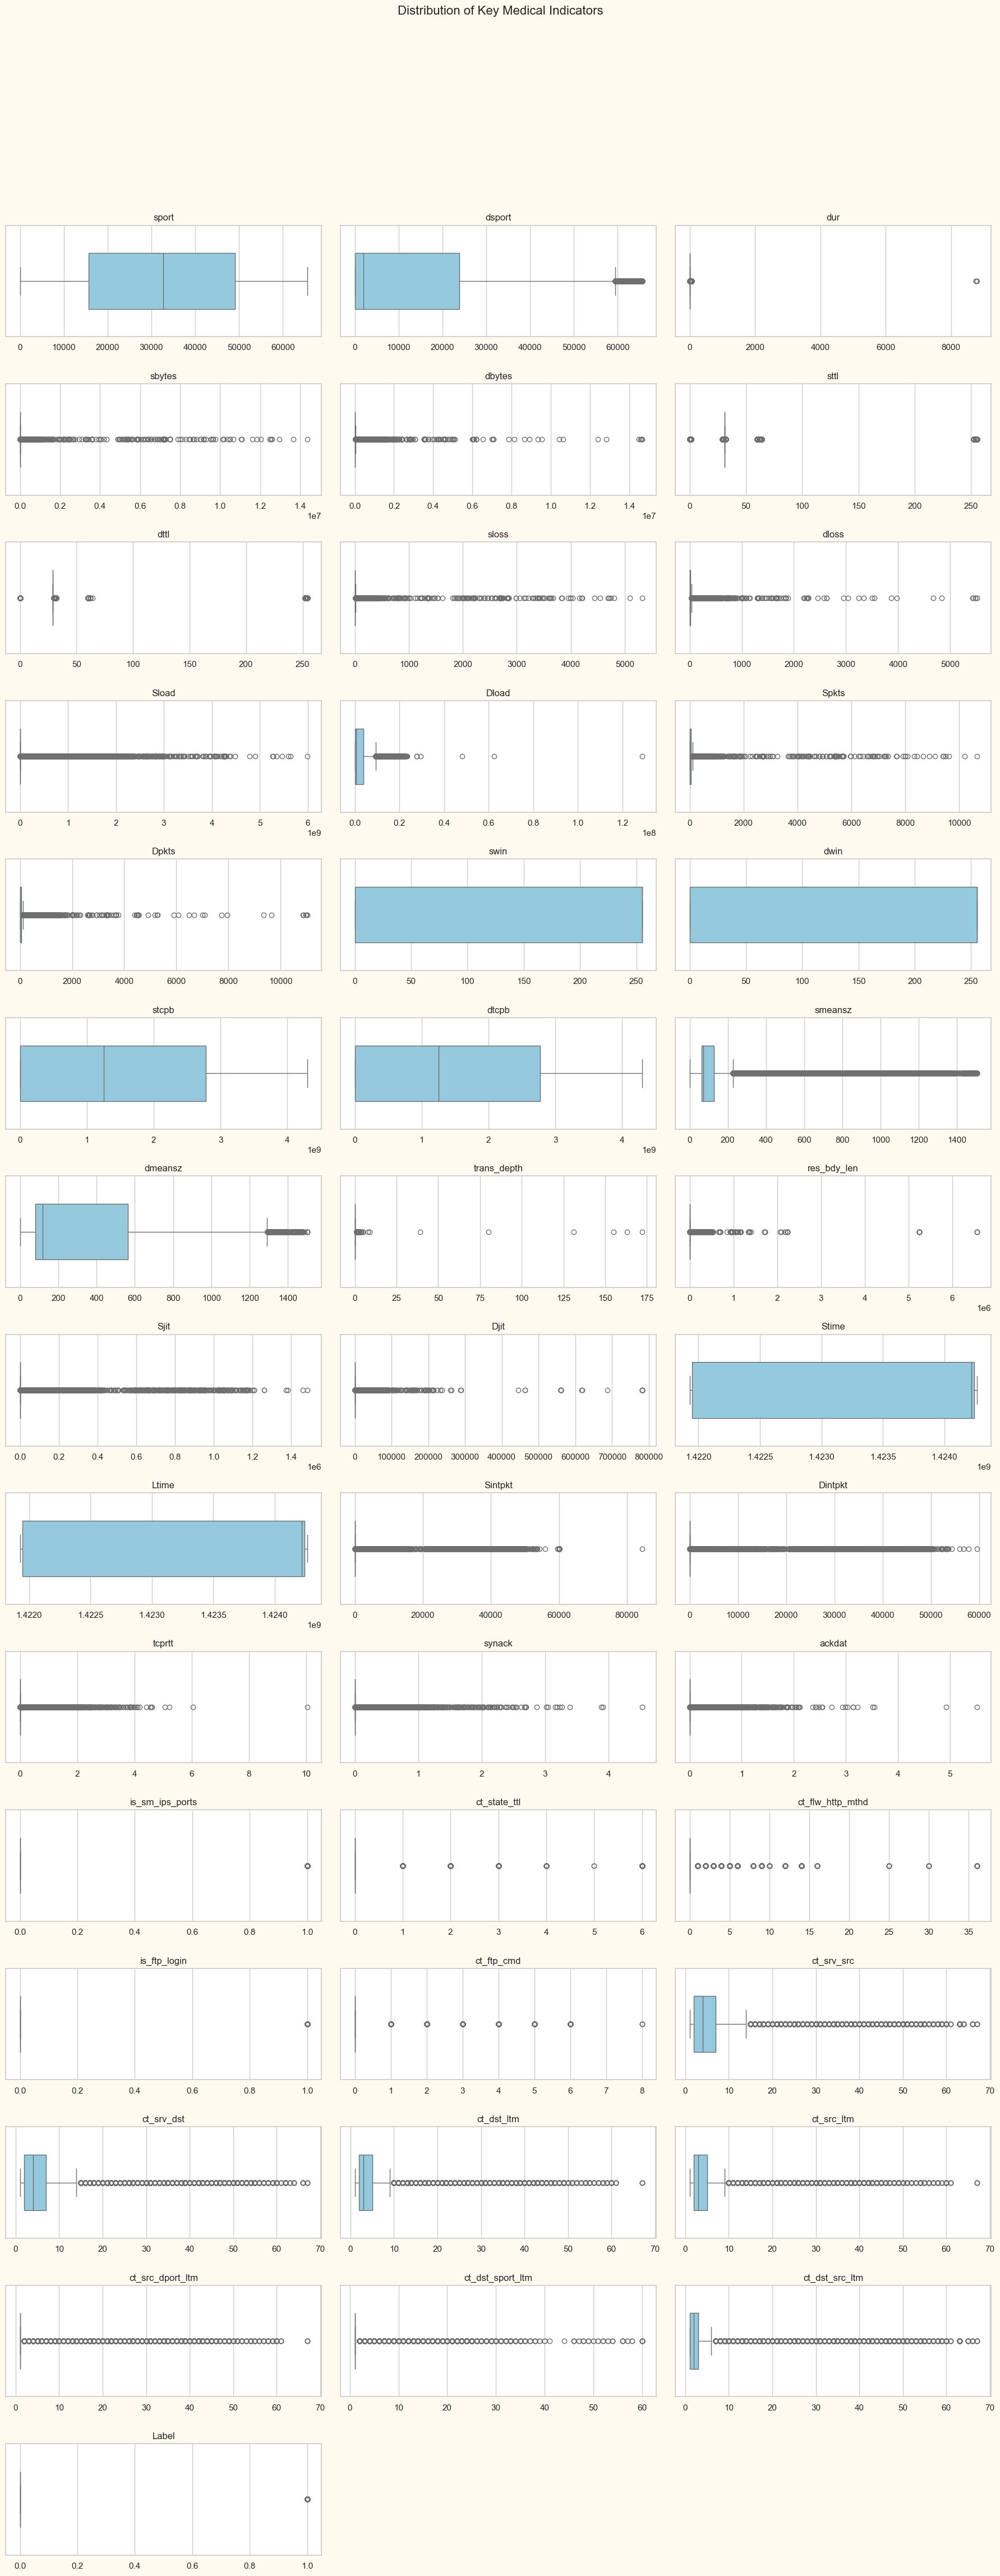

In [44]:
import math
import matplotlib.pyplot as plt
import seaborn as sns

# Number of numerical columns
num_columns = len(numerical_columns)

# Calculate the number of rows and columns needed for the subplots
num_cols = 3  # Fixed number of columns
num_rows = math.ceil(num_columns / num_cols)  # Calculate rows needed

plt.figure(figsize=(18, num_rows * 3))

sns.set_palette("husl")
sns.set_theme(style="whitegrid")

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(x=train_df[col], color='skyblue', width=0.5)
    plt.title(col)
    plt.xlabel("")

plt.suptitle("Distribution of Key Medical Indicators", y=1.02, fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [45]:
# Extract numerical columns
numerical_columns = train_df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Columns to exclude
exclude_columns = ['sport', 'swim', 'dwim', 'stcpb', 'dtcpb', 'Stime', 'Ltime', 'Label']

# Filter out the columns to exclude
numerical_columns = [col for col in numerical_columns if col not in exclude_columns]

In [46]:
# for col in numerical_columns:
#     median_value = train_df[col].median()
#     lower_bound = train_df[col].quantile(0.25) - 1.5 * (train_df[col].quantile(0.75) - train_df[col].quantile(0.25))
#     upper_bound = train_df[col].quantile(0.75) + 1.5 * (train_df[col].quantile(0.75) - train_df[col].quantile(0.25))
#     train_df[col] = train_df[col].apply(lambda x: median_value if x < lower_bound or x > upper_bound else x)

In [47]:
train_df

Name,sport,dsport,proto,state,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,service,Sload,Dload,Spkts,Dpkts,swin,dwin,stcpb,dtcpb,smeansz,dmeansz,trans_depth,res_bdy_len,Sjit,Djit,Stime,Ltime,Sintpkt,Dintpkt,tcprtt,synack,ackdat,is_sm_ips_ports,ct_state_ttl,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,Label
0,57672,3260,tcp,CON,0.285356,986,86,62,252,2,1,-,2.304490e+04,1.205512e+03,6,2,255,255,761934099,3893365633,164,43,0,0,3661.562382,0.000000,1424224369,1424224369,57.071200,0.002000,0.257434,0.182930,0.074504,0,3,0.0,0,0,10,8,4,5,3,1,7,0
1,38052,6881,tcp,FIN,0.314311,1540,1644,31,29,4,4,-,3.675341e+04,3.952773e+04,16,18,255,255,734569334,2907227880,96,91,0,0,1385.623880,35.106383,1424252728,1424252728,20.925067,18.459766,0.000596,0.000494,0.000102,0,0,0.0,0,0,14,6,8,12,5,1,6,0
2,42911,38558,udp,CON,0.301180,536,304,31,29,0,0,-,1.067800e+04,6.056179e+03,4,4,0,0,0,0,134,76,0,0,116.927883,123.543578,1421934312,1421934313,82.683000,87.363000,0.000000,0.000000,0.000000,0,0,0.0,0,0,9,16,7,6,1,1,3,0
3,47439,53,udp,INT,0.000009,114,0,254,0,0,0,dns,5.066666e+07,0.000000e+00,2,0,0,0,0,0,57,0,0,0,0.000000,0.000000,1424252582,1424252582,0.009000,0.000000,0.000000,0.000000,0.000000,0,2,0.0,0,0,33,33,17,17,17,17,33,1
4,61544,53,udp,CON,0.001079,146,178,31,29,0,0,dns,5.412419e+05,6.598702e+05,2,2,0,0,0,0,73,89,0,0,0.000000,0.000000,1424243836,1424243836,0.009000,0.007000,0.000000,0.000000,0.000000,0,0,0.0,0,0,2,2,5,4,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2540035,29290,143,tcp,FIN,0.031870,7820,15060,31,29,30,32,-,1.946909e+06,3.750486e+06,122,126,255,255,1419799572,3566126516,64,120,0,0,17.059750,14.605255,1424235269,1424235269,0.286682,0.250768,0.000662,0.000521,0.000141,0,0,0.0,0,0,5,6,1,4,1,1,1,0
2540037,18378,17406,udp,CON,0.035147,528,304,31,29,0,0,-,9.013572e+04,5.189632e+04,4,4,0,0,0,0,132,76,0,0,9.409706,10.879310,1421957338,1421957338,6.662667,7.699333,0.000000,0.000000,0.000000,0,0,0.0,0,0,11,4,3,7,1,1,1,0
2540038,34415,5190,tcp,FIN,0.008119,1920,4312,31,29,6,6,-,1.806134e+06,4.072423e+06,22,24,255,255,2097393639,4247267529,87,180,0,0,24.265009,21.052982,1421931570,1421931570,0.369952,0.328696,0.000680,0.000548,0.000132,0,0,0.0,0,0,3,10,4,1,1,1,1,0
2540039,56352,53,udp,CON,0.001047,130,162,31,29,0,0,dns,4.966571e+05,6.189111e+05,2,2,0,0,0,0,65,81,0,0,0.000000,0.000000,1424238783,1424238783,0.009000,0.007000,0.000000,0.000000,0.000000,0,0,0.0,0,0,1,1,2,6,1,1,1,0


In [48]:
print(f"Unique values of 'Label':", train_df['Label'].unique())

Unique values of 'Label': [0 1]


<a id='3.2'></a>
## Visualising Data Distribution and Skewness

In [49]:
# # Set the figure size and arrange plots horizontally in pairs
# numerical_features = train_df.select_dtypes(include=['number']).columns
# num_plots = len(numerical_features)
# num_rows = (num_plots + 1) // 2  # Ensure enough rows to accommodate all features
# fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(14, 7*num_rows))

# # Flatten the axes array for easy indexing
# axes = axes.flatten()

# # Loop through the selected columns and create histograms with density
# for i, col in enumerate(numerical_features):
#     sns.histplot(data=train_df, x=col, kde=True, ax=axes[i])
#     axes[i].set_title(f'Histogram with Density for {col}')
#     axes[i].set_xlabel(col)
#     axes[i].set_ylabel('Density')
    
#     # Calculate skewness
#     skewness = skew(train_df[col].dropna())
#     axes[i].text(0.5, 0.95, f'Skewness: {skewness:.2f}', horizontalalignment='center', verticalalignment='top', transform=axes[i].transAxes)

# # Remove any empty subplots if the number of features is odd
# if num_plots % 2 != 0:
#     fig.delaxes(axes[-1])

# plt.tight_layout()

# plt.show()

- |Skewness| < 1: The distribution is approximately symmetric.
- |Skewness| > 1: The distribution is highly skewed.
- |Skewness| between 1 and 2: Moderately skewed distribution.

In [50]:
def transform(x):
    eps = 1e-5
    numerical_columns = x.select_dtypes(include=['float64', 'int64']).columns.tolist()
    
    # Exclude the 'Label' column
    numerical_columns = [col for col in numerical_columns if col != 'Label']
    
    for col in numerical_columns:
        skewness = skew(x[col])
        if skewness > 0:  # Positive skew
            x[col] = np.log(x[col] + eps)
        elif skewness < 0:  # Negative skew
            x[col] = np.log(np.max(x[col] + eps) - x[col] + eps)
        else:  # Symmetric or zero skew
            x[col] = x[col]  # No transformation needed
            
    return x


In [51]:
# transform(train_df)
# train_df

<a id='3.3'></a>
## Visualising Class Distribution

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

def pie_bar_plot(df, col):
    plt.figure(figsize=(10, 6))
    
    # Extract value counts for the specified column
    value_counts = df[col].value_counts().sort_index()

    ax1 = value_counts
    plt.title(f"Distribution by {col}", fontweight="black", size=14, pad=15)
    colors = sns.color_palette('Set2', len(ax1))
    plt.pie(ax1.values, labels=None, autopct="", startangle=90, colors=colors)
    center_circle = plt.Circle((0, 0), 0.4, fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(center_circle)
    plt.show()

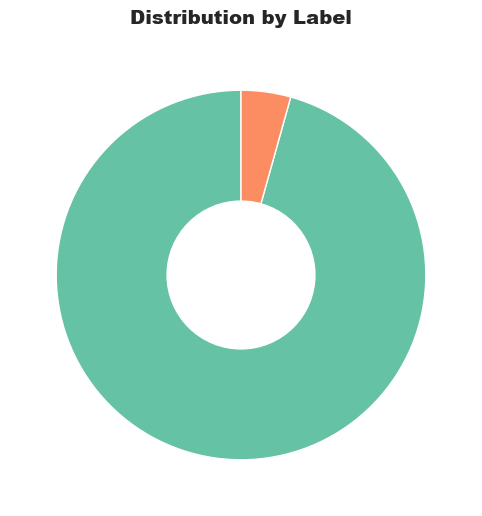

In [53]:
pie_bar_plot(train_df, 'Label')

In [54]:
# Print class distribution before resampling
print("Before resampling:", train_df['Label'].value_counts())
print()

Before resampling: Label
0    1959348
1      88846
Name: count, dtype: int64



<a id='4'></a>
# 4 | Preprocessing



<a id='4.1'></a>
## Featutre Engineering

In [55]:
# experimenting with only keeping selective features : dur, proto, sport, dsport, state, service, Spkts, sbytes, ackdat , Label
# selected_columns = ['dur', 'proto', 'sport', 'dsport', 'state', 'service', 'Spkts', 'sbytes', 'Dpkts', 'dbytes', 'tcprtt','Stime' , 'Ltime' , 'Label']
# train_df = train_df[selected_columns]

train_df.head()


Name,sport,dsport,proto,state,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,service,Sload,Dload,Spkts,Dpkts,swin,dwin,stcpb,dtcpb,smeansz,dmeansz,trans_depth,res_bdy_len,Sjit,Djit,Stime,Ltime,Sintpkt,Dintpkt,tcprtt,synack,ackdat,is_sm_ips_ports,ct_state_ttl,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,Label
0,57672,3260,tcp,CON,0.285356,986,86,62,252,2,1,-,2.304490e+04,1205.511719,6,2,255,255,761934099,3893365633,164,43,0,0,3661.562382,0.000000,1424224369,1424224369,57.071200,0.002000,0.257434,0.182930,0.074504,0,3,0.0,0,0,10,8,4,5,3,1,7,0
1,38052,6881,tcp,FIN,0.314311,1540,1644,31,29,4,4,-,3.675341e+04,39527.730470,16,18,255,255,734569334,2907227880,96,91,0,0,1385.623880,35.106383,1424252728,1424252728,20.925067,18.459766,0.000596,0.000494,0.000102,0,0,0.0,0,0,14,6,8,12,5,1,6,0
2,42911,38558,udp,CON,0.301180,536,304,31,29,0,0,-,1.067800e+04,6056.178711,4,4,0,0,0,0,134,76,0,0,116.927883,123.543578,1421934312,1421934313,82.683000,87.363000,0.000000,0.000000,0.000000,0,0,0.0,0,0,9,16,7,6,1,1,3,0
3,47439,53,udp,INT,0.000009,114,0,254,0,0,0,dns,5.066666e+07,0.000000,2,0,0,0,0,0,57,0,0,0,0.000000,0.000000,1424252582,1424252582,0.009000,0.000000,0.000000,0.000000,0.000000,0,2,0.0,0,0,33,33,17,17,17,17,33,1
4,61544,53,udp,CON,0.001079,146,178,31,29,0,0,dns,5.412419e+05,659870.250000,2,2,0,0,0,0,73,89,0,0,0.000000,0.000000,1424243836,1424243836,0.009000,0.007000,0.000000,0.000000,0.000000,0,0,0.0,0,0,2,2,5,4,1,1,1,0


In [56]:
def generate_features(df):
    # Duration
    df['duration'] = df['Ltime'] - df['Stime']
    
    # Ratios
    df['byte_ratio'] = df['sbytes'] / (df['dbytes'] + 1)
    df['pkt_ratio'] = df['Spkts'] / (df['Dpkts'] + 1)
    df['load_ratio'] = df['Sload'] / (df['Dload'] + 1)
    df['jit_ratio'] = df['Sjit'] / (df['Djit'] + 1)
    df['inter_pkt_ratio'] = df['Sintpkt'] / (df['Dintpkt'] + 1)
    df['tcp_setup_ratio'] = df['tcprtt'] / (df['synack'] + df['ackdat'] + 1)
    
    # Aggregate Features
    df['total_bytes'] = df['sbytes'] + df['dbytes']
    df['total_pkts'] = df['Spkts'] + df['Dpkts']
    df['total_load'] = df['Sload'] + df['Dload']
    df['total_jitter'] = df['Sjit'] + df['Djit']
    df['total_inter_pkt'] = df['Sintpkt'] + df['Dintpkt']
    df['total_tcp_setup'] = df['tcprtt'] + df['synack'] + df['ackdat']
    
    # Interaction Features
    df['byte_pkt_interaction_src'] = df['sbytes'] * df['Spkts']
    df['byte_pkt_interaction_dst'] = df['dbytes'] * df['Dpkts']
    df['load_jit_interaction_src'] = df['Sload'] * df['Sjit']
    df['load_jit_interaction_dst'] = df['Dload'] * df['Djit']
    df['pkt_jit_interaction_src'] = df['Spkts'] * df['Sjit']
    df['pkt_jit_interaction_dst'] = df['Dpkts'] * df['Djit']
    
    # Statistical Features
    df['mean_pkt_size'] = df['smeansz'] + df['dmeansz']
    df['tcp_seq_diff'] = df['stcpb'] - df['dtcpb']
    
    return df

In [57]:
generate_features(train_df)

train_df

Name,sport,dsport,proto,state,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,service,Sload,Dload,Spkts,Dpkts,swin,dwin,stcpb,dtcpb,smeansz,dmeansz,trans_depth,res_bdy_len,Sjit,Djit,Stime,Ltime,Sintpkt,Dintpkt,tcprtt,synack,ackdat,is_sm_ips_ports,ct_state_ttl,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,Label,duration,byte_ratio,pkt_ratio,load_ratio,jit_ratio,inter_pkt_ratio,tcp_setup_ratio,total_bytes,total_pkts,total_load,total_jitter,total_inter_pkt,total_tcp_setup,byte_pkt_interaction_src,byte_pkt_interaction_dst,load_jit_interaction_src,load_jit_interaction_dst,pkt_jit_interaction_src,pkt_jit_interaction_dst,mean_pkt_size,tcp_seq_diff
0,57672,3260,tcp,CON,0.285356,986,86,62,252,2,1,-,2.304490e+04,1.205512e+03,6,2,255,255,761934099,3893365633,164,43,0,0,3661.562382,0.000000,1424224369,1424224369,57.071200,0.002000,0.257434,0.182930,0.074504,0,3,0.0,0,0,10,8,4,5,3,1,7,0,0,11.333333,2.000000,1.910044e+01,3661.562382,56.957285,0.204730,1072,8,2.425041e+04,3661.562382,57.073200,0.514868,5916,172,8.438034e+07,0.000000e+00,21969.374292,0.000000,207,-3131431534
1,38052,6881,tcp,FIN,0.314311,1540,1644,31,29,4,4,-,3.675341e+04,3.952773e+04,16,18,255,255,734569334,2907227880,96,91,0,0,1385.623880,35.106383,1424252728,1424252728,20.925067,18.459766,0.000596,0.000494,0.000102,0,0,0.0,0,0,14,6,8,12,5,1,6,0,0,0.936170,0.842105,9.297897e-01,38.376148,1.075299,0.000596,3184,34,7.628114e+04,1420.730263,39.384833,0.001192,24640,29592,5.092640e+07,1.387676e+06,22169.982080,631.914894,187,-2172658546
2,42911,38558,udp,CON,0.301180,536,304,31,29,0,0,-,1.067800e+04,6.056179e+03,4,4,0,0,0,0,134,76,0,0,116.927883,123.543578,1421934312,1421934313,82.683000,87.363000,0.000000,0.000000,0.000000,0,0,0.0,0,0,9,16,7,6,1,1,3,0,1,1.757377,0.800000,1.762867e+00,0.938851,0.935720,0.000000,840,8,1.673418e+04,240.471461,170.046000,0.000000,2144,1216,1.248556e+06,7.482020e+05,467.711532,494.174312,210,0
3,47439,53,udp,INT,0.000009,114,0,254,0,0,0,dns,5.066666e+07,0.000000e+00,2,0,0,0,0,0,57,0,0,0,0.000000,0.000000,1424252582,1424252582,0.009000,0.000000,0.000000,0.000000,0.000000,0,2,0.0,0,0,33,33,17,17,17,17,33,1,0,114.000000,2.000000,5.066666e+07,0.000000,0.009000,0.000000,114,2,5.066666e+07,0.000000,0.009000,0.000000,228,0,0.000000e+00,0.000000e+00,0.000000,0.000000,57,0
4,61544,53,udp,CON,0.001079,146,178,31,29,0,0,dns,5.412419e+05,6.598702e+05,2,2,0,0,0,0,73,89,0,0,0.000000,0.000000,1424243836,1424243836,0.009000,0.007000,0.000000,0.000000,0.000000,0,0,0.0,0,0,2,2,5,4,1,1,1,0,0,0.815642,0.666667,8.202235e-01,0.000000,0.008937,0.000000,324,4,1.201112e+06,0.000000,0.016000,0.000000,292,356,0.000000e+00,0.000000e+00,0.000000,0.000000,162,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2540035,29290,143,tcp,FIN,0.031870,7820,15060,31,29,30,32,-,1.946909e+06,3.750486e+06,122,126,255,255,1419799572,3566126516,64,120,0,0,17.059750,14.605255,1424235269,1424235269,0.286682,0.250768,0.000662,0.000521,0.000141,0,0,0.0,0,0,5,6,1,4,1,1,1,0,0,0.519222,0.960630,5.191084e-01,1.093205,0.229205,0.000662,22880,248,5.697396e+06,31.665005,0.537450,0.001324,954040,1897560,3.321379e+07,5.477681e+07,2081.289500,1840.262130,184,-2146326944
2540037,18378,17406,udp,CON,0.035147,528,304,31,29,0,0,-,9.013572e+04,5.189632e+04,4,4,0,0,0,0,132,76,0,0,9.409706,10.879310,1421957338,1421957338,6.662667,7.699333,0.000000,0.000000,0.000000,0,0,0.0,0,0,11,4,3,7,1,1,1,0,0,1.731148,0.800000,1.736809e+00,0.792109,0.765883,0.000000,832,8,1.420320e+05,20.289016,14.362000,0.000000,2112,1216,8.481506e+05,5.645962e+05,37.638824,43.517240,208,0
2540038,34415,5190,tcp,FIN,0.008119,1920,4312,31,29,6,6,-,1.806134e+06,4.072423e+06,22,24,255,255,2097393639,4247267529,87,180,0,0,24.265009,21.052982,142193

In [58]:
#Checking the categorical columns 
cat_columns = train_df.select_dtypes(include=['O']).columns.tolist()
cat_columns

['proto', 'state', 'service']

<a id='4.2'></a>
## Encode leftover categorical features

In this case im also encoding Label though unnecessary, but just to be sure

In [59]:

# Initialize LabelEncoder
# label_encoder = LabelEncoder()
label_encoder_proto = LabelEncoder()
label_encoder_state = LabelEncoder()
label_encoder_service = LabelEncoder()


# Apply LabelEncoder to each categorical feature
# train_df['Label'] = label_encoder.fit_transform(train_df['Label'])
train_df['proto'] = label_encoder_proto.fit_transform(train_df['proto'])
train_df['state'] = label_encoder_state.fit_transform(train_df['state'])
train_df['service'] = label_encoder_service.fit_transform(train_df['service'])

# Create the label mapping
# label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
proto_mapping = dict(zip(label_encoder_proto.classes_, label_encoder_proto.transform(label_encoder_proto.classes_)))
state_mapping = dict(zip(label_encoder_state.classes_, label_encoder_state.transform(label_encoder_state.classes_)))
service_mapping = dict(zip(label_encoder_service.classes_, label_encoder_service.transform(label_encoder_service.classes_)))

# print("Label Mapping:")
# print(label_mapping)

print("Proto Mapping:")
print(proto_mapping)

print("State Mapping:")
print(state_mapping)

print("Service Mapping:")
print(service_mapping)

Proto Mapping:
{'3pc': 0, 'a/n': 1, 'aes-sp3-d': 2, 'any': 3, 'argus': 4, 'aris': 5, 'arp': 6, 'ax.25': 7, 'bbn-rcc': 8, 'bna': 9, 'br-sat-mon': 10, 'cbt': 11, 'cftp': 12, 'chaos': 13, 'compaq-peer': 14, 'cphb': 15, 'cpnx': 16, 'crtp': 17, 'crudp': 18, 'dcn': 19, 'ddp': 20, 'ddx': 21, 'dgp': 22, 'egp': 23, 'eigrp': 24, 'emcon': 25, 'encap': 26, 'esp': 27, 'etherip': 28, 'fc': 29, 'fire': 30, 'ggp': 31, 'gmtp': 32, 'gre': 33, 'hmp': 34, 'i-nlsp': 35, 'iatp': 36, 'ib': 37, 'icmp': 38, 'idpr': 39, 'idpr-cmtp': 40, 'idrp': 41, 'ifmp': 42, 'igmp': 43, 'igp': 44, 'il': 45, 'ip': 46, 'ipcomp': 47, 'ipcv': 48, 'ipip': 49, 'iplt': 50, 'ipnip': 51, 'ippc': 52, 'ipv6': 53, 'ipv6-frag': 54, 'ipv6-no': 55, 'ipv6-opts': 56, 'ipv6-route': 57, 'ipx-n-ip': 58, 'irtp': 59, 'isis': 60, 'iso-ip': 61, 'iso-tp4': 62, 'kryptolan': 63, 'l2tp': 64, 'larp': 65, 'leaf-1': 66, 'leaf-2': 67, 'merit-inp': 68, 'mfe-nsp': 69, 'mhrp': 70, 'micp': 71, 'mobile': 72, 'mtp': 73, 'mux': 74, 'narp': 75, 'netblt': 76, 'nsfne

In [60]:
#Checking the categorical columns 
cat_columns = train_df.select_dtypes(include=['O']).columns.tolist()
cat_columns

[]

<a id='4.3'></a>
## Checking Highly Correlated Features

<Axes: title={'center': 'Correlation Plot'}, xlabel='Name', ylabel='Name'>

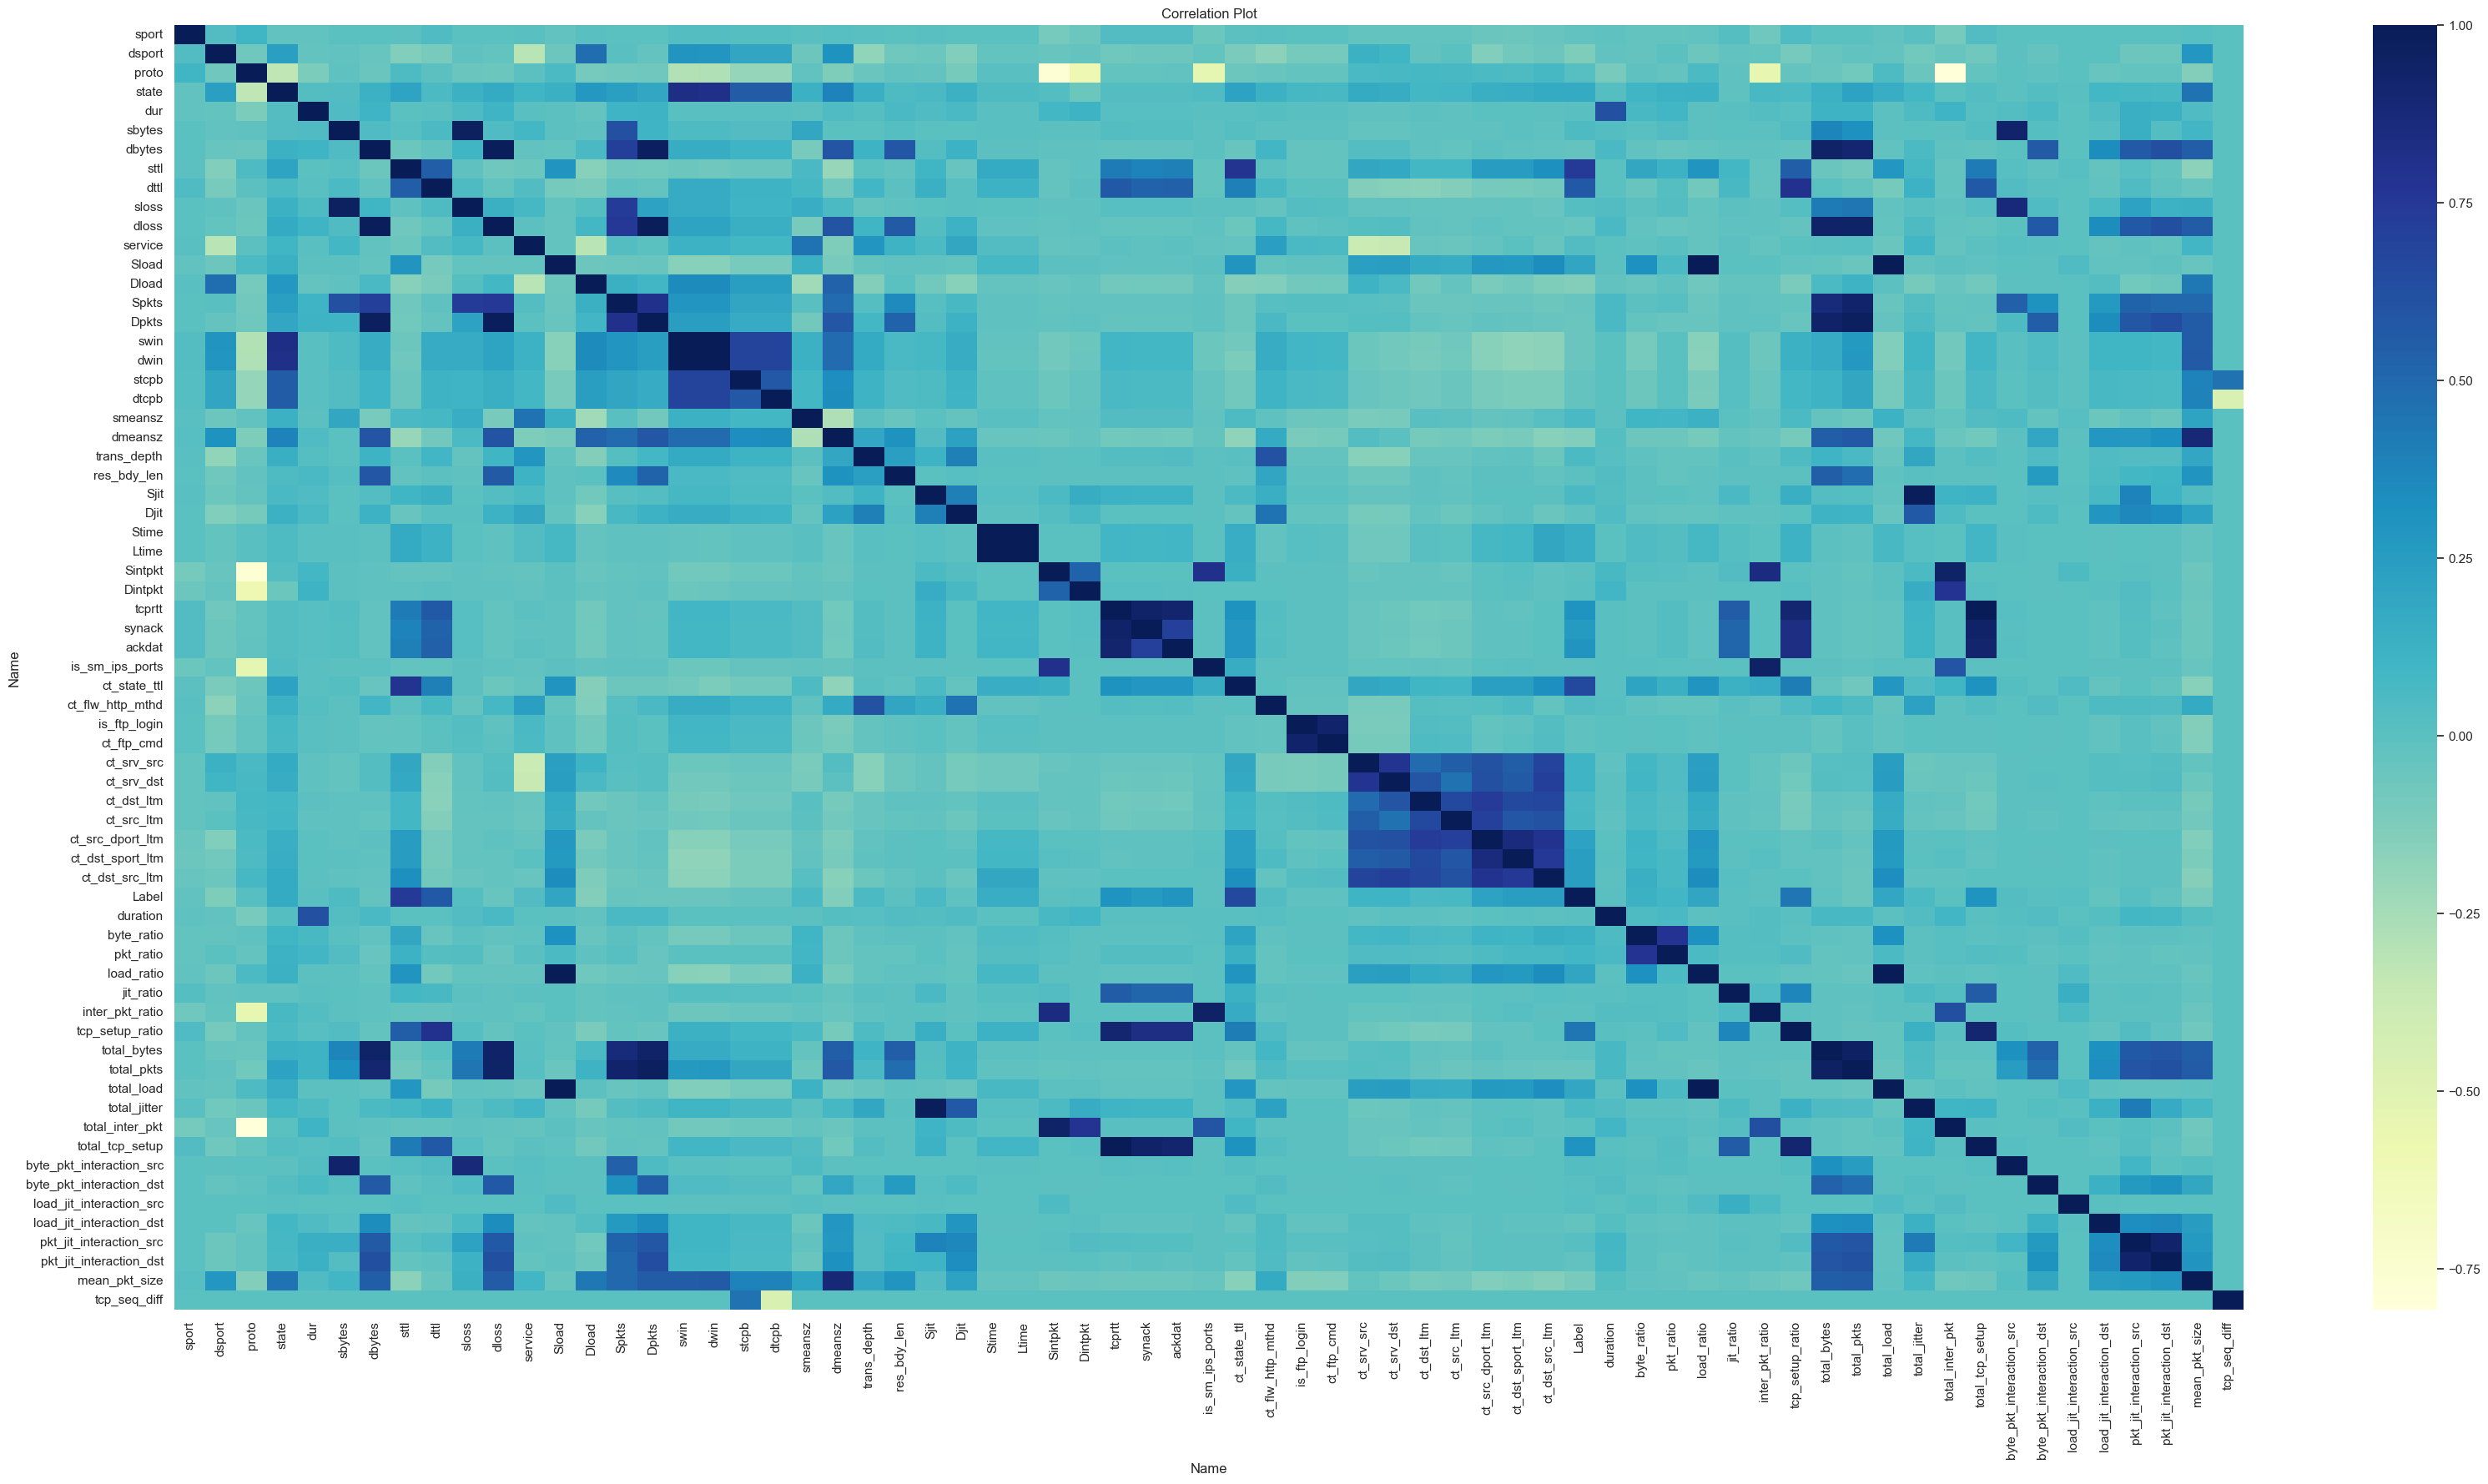

In [61]:
plt.figure(figsize=(40,20))
plt.title("Correlation Plot")
sns.heatmap(train_df.corr(),cmap='YlGnBu')

In [62]:
# Calculate the correlation matrix
correlation_matrix = train_df.corr()

# Set the correlation threshold (adjust if necessary)
correlation_threshold = 0.8

# Identify highly correlated features
highly_correlated_features = set()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) >= correlation_threshold:
            feature1 = correlation_matrix.columns[i]
            feature2 = correlation_matrix.columns[j]
            highly_correlated_features.add((feature1, feature2))

# Print the highly correlated features
print("Highly correlated features:")
for feature1, feature2 in highly_correlated_features:
    print(f"{feature1} and {feature2}")


Highly correlated features:
total_pkts and dbytes
total_tcp_setup and tcp_setup_ratio
Dpkts and dbytes
total_tcp_setup and tcprtt
ct_dst_sport_ltm and ct_src_dport_ltm
load_ratio and Sload
total_jitter and Sjit
byte_pkt_interaction_src and sbytes
ct_ftp_cmd and is_ftp_login
byte_pkt_interaction_src and sloss
total_tcp_setup and synack
Ltime and Stime
tcp_setup_ratio and ackdat
ackdat and tcprtt
swin and state
dloss and dbytes
total_inter_pkt and proto
mean_pkt_size and dmeansz
sloss and sbytes
dwin and state
total_bytes and Spkts
total_bytes and Dpkts
total_pkts and Spkts
total_pkts and Dpkts
is_sm_ips_ports and Sintpkt
Dpkts and Spkts
tcp_setup_ratio and tcprtt
total_load and Sload
tcp_setup_ratio and synack
total_bytes and dloss
total_pkts and total_bytes
total_tcp_setup and ackdat
total_pkts and dloss
pkt_jit_interaction_dst and pkt_jit_interaction_src
Dpkts and dloss
inter_pkt_ratio and Sintpkt
total_load and load_ratio
synack and tcprtt
total_bytes and dbytes
dwin and swin
inter_p

In [63]:
# Create a set of features to drop
features_to_drop = set()

# Ensure required features are preserved
required_features = {'dport', 'sport', 'state', 'proto', 'service', 'Label'}

# Drop the least important feature from each correlated pair
for feature1, feature2 in highly_correlated_features:
    if feature1 not in required_features and feature2 not in required_features:
        # Choose the feature with higher correlation to the label for retention
        if abs(correlation_matrix.loc[feature1, 'Label']) > abs(correlation_matrix.loc[feature2, 'Label']):
            features_to_drop.add(feature2)
        else:
            features_to_drop.add(feature1)

# Drop the features from the DataFrame
train_df = train_df.drop(columns=list(features_to_drop))

# Print the remaining features
print("Remaining features after dropping highly correlated ones:")
print(train_df.columns)

Remaining features after dropping highly correlated ones:
Index(['sport', 'dsport', 'proto', 'state', 'dur', 'sbytes', 'sttl', 'dttl',
       'service', 'Dload', 'Dpkts', 'swin', 'stcpb', 'dtcpb', 'smeansz',
       'dmeansz', 'trans_depth', 'res_bdy_len', 'Sjit', 'Djit', 'Ltime',
       'Dintpkt', 'is_sm_ips_ports', 'ct_state_ttl', 'ct_flw_http_mthd',
       'is_ftp_login', 'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ltm',
       'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'Label', 'duration', 'byte_ratio',
       'pkt_ratio', 'load_ratio', 'jit_ratio', 'tcp_setup_ratio',
       'byte_pkt_interaction_dst', 'load_jit_interaction_src',
       'load_jit_interaction_dst', 'pkt_jit_interaction_dst', 'tcp_seq_diff'],
      dtype='object', name='Name')


<a id='4.4'></a>
## Splitting the features in dependent and independent features


Split for Anomaly detection One Class SVM

In [64]:
# # from sklearn.model_selection import train_test_split

# # View how many rows-columns exists in the main dataset
# rows, columns = train_df.shape
# print(f"Number of rows: {rows}")
# print(f"Number of columns: {columns}")

# x and y to be used for SVM unsuprvised learning trained in the full capacity of normal samples
# Sample 5% of the data, or about 100k entries, since its over 2 million entries and would take too long to train.
# sample_df, _ = train_test_split(train_df, test_size=0.95, stratify=train_df['Label'], random_state=42)
# sample_df.to_csv('sample_dataset.csv', index=False)

# x_train_ocsvm = sample_df[sample_df['Label'] == 0].drop(['Label'], axis=1)
# y_train_ocsvm = sample_df[sample_df['Label'] == 0]['Label']

# x_test_ocsvm = sample_df.drop(['Label'], axis=1)
# y_test_ocsvm = sample_df[['Label']]

# rows, columns = x_train_ocsvm.shape
# print(f"Number of rows: {rows}")
# print(f"Number of columns: {columns}")
# print("1 and 0 distribution:", y_train_ocsvm.value_counts())


# # # The above information will be used only at the OneClassSVM model training

In [65]:
train_df.shape

(2048194, 44)

In [66]:
train_df['Label'].value_counts()

Label
0    1959348
1      88846
Name: count, dtype: int64

In [67]:
train_df.to_csv('dataset.csv', index=False)

In [68]:
x = train_df.drop(['Label'], axis=1)
y = train_df[['Label']]

# x_train_ocsvm = train_df[train_df['Label'] == 0].drop(['Label'], axis=1)

# Filter rows where Label is 0
label_0_df = train_df[train_df['Label'] == 0]

# Randomly sample 20% of these rows
x_train_ocsvm = label_0_df.sample(frac=0.20, random_state=42)

# Drop the 'Label' column
x_train_ocsvm = x_train_ocsvm.drop(['Label'], axis=1)

# Now x_train_ocsvm contains 10% of the rows where Label is 0
x_train_ocsvm.shape

(391870, 43)

In [69]:
# x = train_df.drop(['Label'], axis=1)
# y = train_df[['Label']]

x.shape

(2048194, 43)

<a id='4.5'></a>
## Applying SMOTE to balance the unbalanced data


In [70]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
import pandas as pd

# Define the desired number of samples for each class
desired_count = 88000

# oversample_strategy = {key: desired_count for key in y.value_counts().index if y.value_counts()[key] < desired_count}
# undersample_strategy = {key: desired_count for key in y.value_counts().index if y.value_counts()[key] > desired_count}

# Define the oversampling strategy for SMOTE
oversample_strategy = {i: desired_count for i in range(len(y.value_counts())) if y.value_counts()[i] < desired_count}

# Define the undersampling strategy for RandomUnderSampler
undersample_strategy = {i: desired_count for i in range(len(y.value_counts())) if y.value_counts()[i] > desired_count}

# Create the SMOTE and RandomUnderSampler objects
smote = SMOTE(sampling_strategy=oversample_strategy)
undersample = RandomUnderSampler(sampling_strategy=undersample_strategy)

# Combine SMOTE and RandomUnderSampler in a pipeline
pipeline = Pipeline(steps=[('smote', smote), ('undersample', undersample)])

# Print class distribution before resampling
print("Before resampling:", y.value_counts())
print()

# Apply the pipeline to resample the dataset
x_resampled, y_resampled = pipeline.fit_resample(x, y)

# Print class distribution after resampling
print("After resampling:", y_resampled.value_counts())

Before resampling: Label
0        1959348
1          88846
Name: count, dtype: int64

After resampling: Label
0        88000
1        88000
Name: count, dtype: int64


In [71]:
# x and y to be used for supervised learning Classification

x = x_resampled
y = y_resampled



<a id='4.6'></a>
## Checking Feature Importance


### Method 1: Mutual Infromation Score 

In [72]:
# Determine which features are discrete
from sklearn.feature_selection import mutual_info_classif


discrete_features = x.dtypes == int

# Function to calculate mutual information scores for feature selection
def mi_score_maker(x, y, discrete_features):
    """
    This function calculates mutual information scores for each feature in the dataset
    relative to the target variable. It helps in identifying the importance of each feature 
    in predicting the target.

    Parameters:
    x (DataFrame): The feature matrix.
    y (Series): The target variable.
    discrete_features (Series): Boolean series indicating which features are discrete.

    Returns:
    DataFrame: A DataFrame containing features and their corresponding mutual information scores,
               sorted in descending order of the scores.
    """
    # Calculate mutual information scores for each feature
    scores = mutual_info_classif(x, y, discrete_features=discrete_features)
    
    # Create a DataFrame to hold the feature names and their scores
    df = pd.DataFrame({'Features': x.columns, 'Scores': scores})

    
    # Sort the DataFrame by scores in descending order and reset the index
    df = df.sort_values('Scores', ascending=False).reset_index(drop=True)
    
    return df


In [73]:
# mi_scores = mi_score_maker(x,y.astype('float64'),discrete_features)
# mi_scores = mi_score_maker(x,y.astype('float64', 'int64'),discrete_features)

# Calculate mutual information scores
mi_scores = mi_score_maker(x, y, discrete_features)

# Display the scores
mi_scores

,Features,Scores
0,sttl,0.662630
1,ct_state_ttl,0.644110
2,dttl,0.633365
3,sbytes,0.596187
4,byte_ratio,0.593391
5,byte_pkt_interaction_dst,0.586335
6,pkt_ratio,0.502947
7,dmeansz,0.466429
8,Dintpkt,0.462894
9,Dload,0.445452


In [74]:
# Drop low-score features based on mutual information threshold
mi_threshold = 0.1
low_score_features = mi_scores[mi_scores['Scores'] < mi_threshold]

# Extract the feature names
low_score_feature_names = low_score_features['Features'].tolist()

# Print the list of low score feature names
low_score_feature_names

['load_jit_interaction_src',
 'ct_srv_src',
 'sport',
 'ct_dst_src_ltm',
 'ct_dst_sport_ltm',
 'res_bdy_len',
 'service',
 'duration',
 'swin',
 'proto',
 'trans_depth',
 'ct_flw_http_mthd',
 'dtcpb',
 'stcpb',
 'is_ftp_login',
 'is_sm_ips_ports']

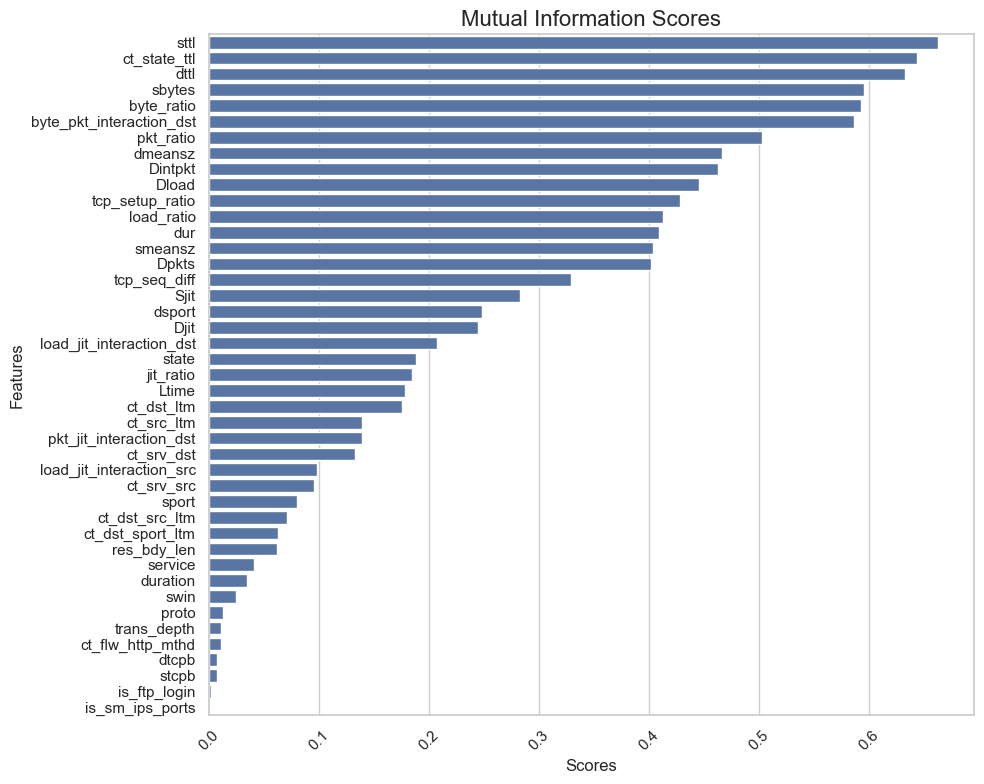

In [75]:
plt.figure(figsize=(10, 8))

# Create the barplot
sns.barplot(x='Scores', y='Features', data=mi_scores)

# Add a title
plt.title("Mutual Information Scores", fontsize=16)

# Rotate the y-axis labels (if needed)
plt.yticks(rotation=0)

# Rotate the x-axis labels (if needed)
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()  # Adjusts the plot to ensure everything fits without overlap
plt.show()

In [76]:
x.drop(low_score_feature_names,axis=1, inplace = True)
remaining_features = x.columns
print(remaining_features)

Index(['dsport', 'state', 'dur', 'sbytes', 'sttl', 'dttl', 'Dload', 'Dpkts',
       'smeansz', 'dmeansz', 'Sjit', 'Djit', 'Ltime', 'Dintpkt',
       'ct_state_ttl', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ltm', 'byte_ratio',
       'pkt_ratio', 'load_ratio', 'jit_ratio', 'tcp_setup_ratio',
       'byte_pkt_interaction_dst', 'load_jit_interaction_dst',
       'pkt_jit_interaction_dst', 'tcp_seq_diff'],
      dtype='object', name='Name')


## Method 2: p-values and VIF

In [77]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

# Adding a constant term for the intercept in the regression model
x = sm.add_constant(x)

# Function to calculate p-values
def calculate_p_values(x, y):
    model = sm.OLS(y, x).fit()
    return model.pvalues

# Function to calculate VIF
def calculate_vif(x):
    vif_data = pd.DataFrame()
    vif_data["feature"] = x.columns
    vif_data["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    return vif_data

# Initial calculation of p-values and VIF
p_values = calculate_p_values(x, y)
vif_data = calculate_vif(x)

# Combine p-values and VIF into a single DataFrame with rounding
feature_stats = pd.DataFrame({
    "feature": p_values.index,
    "p_value": np.round(p_values.values, 2),
    "VIF": np.round(vif_data["VIF"], 2)
})

# Sort by p_value first, then by VIF in descending order
feature_stats = feature_stats[feature_stats["feature"] != "const"]

# Display the sorted feature statistics
print(feature_stats)


                     feature  p_value   VIF
1                     dsport     0.00  1.49
2                      state     0.00  1.91
3                        dur     0.00  1.97
4                     sbytes     0.00  1.38
5                       sttl     0.00  4.31
6                       dttl     0.00  4.93
7                      Dload     0.00  2.08
8                      Dpkts     0.00  5.39
9                    smeansz     0.00  1.33
10                   dmeansz     0.00  3.51
11                      Sjit     0.00  1.55
12                      Djit     0.00  1.83
13                     Ltime     0.00  1.18
14                   Dintpkt     0.00  1.35
15              ct_state_ttl     0.00  4.44
16                ct_srv_dst     0.00  3.11
17                ct_dst_ltm     0.36  4.51
18                ct_src_ltm     0.00  3.49
19                byte_ratio     0.00  3.15
20                 pkt_ratio     0.03  2.83
21                load_ratio     0.00  1.55
22                 jit_ratio    

In [78]:
x.shape

(176000, 28)

In [79]:
# Define thresholds
p_value_threshold = 0.05
vif_threshold = 10

# Iterative process
while True:
    # Step 1: Identify features with high p-value (regardless of VIF)
    high_p_features = feature_stats[feature_stats['p_value'] > p_value_threshold]

    # Step 2: Drop these features from the dataset
    if not high_p_features.empty:
        x.drop(columns=high_p_features['feature'], axis=1, inplace=True)
    else:
        # No more features with high p-value, now check VIF
        high_vif_features = feature_stats[feature_stats['VIF'] > vif_threshold]
        
        if not high_vif_features.empty:
            x.drop(columns=high_vif_features['feature'], axis=1, inplace=True)
        else:
            # If there are no features to drop, break the loop
            break

    # Recalculate p-values and VIF for the reduced feature set
    p_values = calculate_p_values(x, y)
    vif_data = calculate_vif(x)

    # Update the combined feature statistics
    feature_stats = pd.DataFrame({
        "feature": p_values.index,
        "p_value": np.round(p_values.values, 2),
        "VIF": np.round(vif_data["VIF"], 2)
    })

    # Remove 'const' if added
    feature_stats = feature_stats[feature_stats["feature"] != "const"]

# Final selected features
final_selected_features = feature_stats[
    (feature_stats['p_value'] <= p_value_threshold) & 
    (feature_stats['VIF'] <= vif_threshold)
]['feature'].tolist()

print(f"Final selected features: {final_selected_features}")


Final selected features: ['dsport', 'state', 'dur', 'sbytes', 'sttl', 'dttl', 'Dload', 'Dpkts', 'smeansz', 'dmeansz', 'Sjit', 'Djit', 'Ltime', 'Dintpkt', 'ct_state_ttl', 'ct_srv_dst', 'ct_src_ltm', 'byte_ratio', 'pkt_ratio', 'load_ratio', 'jit_ratio', 'tcp_setup_ratio', 'byte_pkt_interaction_dst', 'load_jit_interaction_dst', 'pkt_jit_interaction_dst']


In [80]:
x = x.drop(columns=['const'])



In [81]:
x

,dsport,state,dur,sbytes,sttl,dttl,Dload,Dpkts,smeansz,dmeansz,Sjit,Djit,Ltime,Dintpkt,ct_state_ttl,ct_srv_dst,ct_src_ltm,byte_ratio,pkt_ratio,load_ratio,jit_ratio,tcp_setup_ratio,byte_pkt_interaction_dst,load_jit_interaction_dst,pkt_jit_interaction_dst
1404802,111,2,0.004683,568,31,29,3.997438e+05,4,142,78,1.693757,1.541023,1421959462,1.093667,0,6,2,1.814696,0.800000,1.820508e+00,0.666565,0.000000,1248,6.160143e+05,6.164092
232361,17511,5,0.003900,320,31,29,3.429744e+06,8,53,239,41.870365,0.872573,1421929521,0.482714,0,3,9,0.167452,0.666667,1.596889e-01,22.359804,0.000663,15280,2.992702e+06,6.980584
522913,3104,5,0.050015,4862,31,29,1.213684e+07,86,58,893,34.335439,34.569564,1421958494,0.581000,0,8,4,0.063331,0.965517,6.332533e-02,0.965304,0.000752,6602220,4.195652e+08,2972.982504
344033,6881,5,0.016921,1540,31,29,7.342356e+05,18,96,91,74.994704,1.857759,1424261761,0.969000,0,4,3,0.936170,0.842105,9.298120e-01,26.242487,0.000774,29592,1.364033e+06,33.439662
1484067,80,5,7.721858,18370,31,29,1.125565e+06,746,53,1458,1484.131506,991.911061,1421955785,10.364280,0,11,6,0.016886,0.460509,1.685976e-02,1.494728,0.000611,811565940,1.116461e+09,739965.651506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1624969,53,6,0.000003,114,254,0,0.000000e+00,0,57,0,0.000000,0.000000,1424246242,0.000000,2,40,1,114.000000,2.000000,1.520000e+08,0.000000,0.000000,0,0.000000e+00,0.000000
38154,53,6,0.000009,114,254,0,0.000000e+00,0,57,0,0.000000,0.000000,1424232937,0.000000,2,22,23,114.000000,2.000000,5.066666e+07,0.000000,0.000000,0,0.000000e+00,0.000000
1281223,111,6,0.000001,168,254,0,0.000000e+00,0,84,0,0.000000,0.000000,1424237160,0.000000,2,1,2,168.000000,2.000000,6.720000e+08,0.000000,0.000000,0,0.000000e+00,0.000000
1935414,80,5,0.176218,806,254,252,1.016922e+04,6,81,45,1000.381241,47.035555,1424234196,30.923400,1,1,1,2.996283,1.428571,3.240753e+00,20.825850,0.068361,1608,4.783150e+05,282.213330


## Method 3: Recursive Feature Elimination (RFE)

In [82]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Initialize the model (Logistic Regression is used as a baseline)
model = LogisticRegression(max_iter=1000)

# Initialize RFE with the model and select the top 'n' features
rfe = RFE(estimator=model, n_features_to_select=20)  # Adjust 'n_features_to_select' as needed
rfe.fit(x, y)

# Get the ranking of the features
rfe_ranking = rfe.ranking_

# Filter out features that were not selected by RFE (ranking > 1)
x = x.loc[:, rfe.support_]

# Print the selected features
print("Selected features after RFE:", x.columns.tolist())


Selected features after RFE: ['dsport', 'state', 'sbytes', 'sttl', 'dttl', 'Dload', 'Dpkts', 'smeansz', 'dmeansz', 'Sjit', 'Djit', 'Dintpkt', 'ct_state_ttl', 'ct_srv_dst', 'ct_src_ltm', 'byte_ratio', 'pkt_ratio', 'jit_ratio', 'tcp_setup_ratio', 'pkt_jit_interaction_dst']


In [83]:
x.shape

(176000, 20)

In [84]:
# Giving the final features of classifier x train, to the one class x train
x_train_ocsvm = x_train_ocsvm[x.columns]

In [85]:
x_train_ocsvm.shape 

(391870, 20)

In [86]:
x_train_ocsvm

Name,dsport,state,sbytes,sttl,dttl,Dload,Dpkts,smeansz,dmeansz,Sjit,Djit,Dintpkt,ct_state_ttl,ct_srv_dst,ct_src_ltm,byte_ratio,pkt_ratio,jit_ratio,tcp_setup_ratio,pkt_jit_interaction_dst
412401,53,2,146,31,29,6.899225e+05,2,73,89,0.000000,0.000000,0.008000,0,6,1,0.815642,0.666667,0.000000,0.000000,0.000000
1489647,25290,5,2646,31,29,1.527585e+07,44,63,579,18.032586,17.047474,0.290814,0,1,4,0.103883,0.933333,0.999175,0.000663,750.088856
371934,5190,5,1064,31,29,3.902071e+06,12,89,188,17.837295,0.393163,0.335818,0,7,3,0.470588,0.923077,12.803452,0.000704,4.717956
1908726,5190,5,1920,31,29,4.416701e+04,24,87,180,2645.892522,2533.454496,32.521086,0,3,2,0.445166,0.880000,1.043969,0.000742,60802.907904
729971,53,2,132,31,29,6.159624e+05,2,66,82,0.000000,0.000000,0.009000,0,1,4,0.800000,0.666667,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1390698,11972,5,2646,31,29,6.872230e+06,40,63,551,46.750677,1.367224,0.625103,0,6,3,0.120136,1.024390,19.749156,0.000756,54.688960
2039135,111,2,568,31,29,4.168476e+05,4,142,80,1.663353,1.492467,1.062333,0,5,5,1.769470,0.800000,0.667352,0.000000,5.969868
80809,53,2,130,31,29,6.328125e+05,2,65,81,0.000000,0.000000,0.001000,0,1,4,0.797546,0.666667,0.000000,0.000000,0.000000
619382,53,2,130,31,29,6.206896e+05,2,65,81,0.000000,0.000000,0.007000,0,5,4,0.797546,0.666667,0.000000,0.000000,0.000000


## New Correlation Plot showing only high-scored features

<Axes: title={'center': 'Correlation Plot'}>

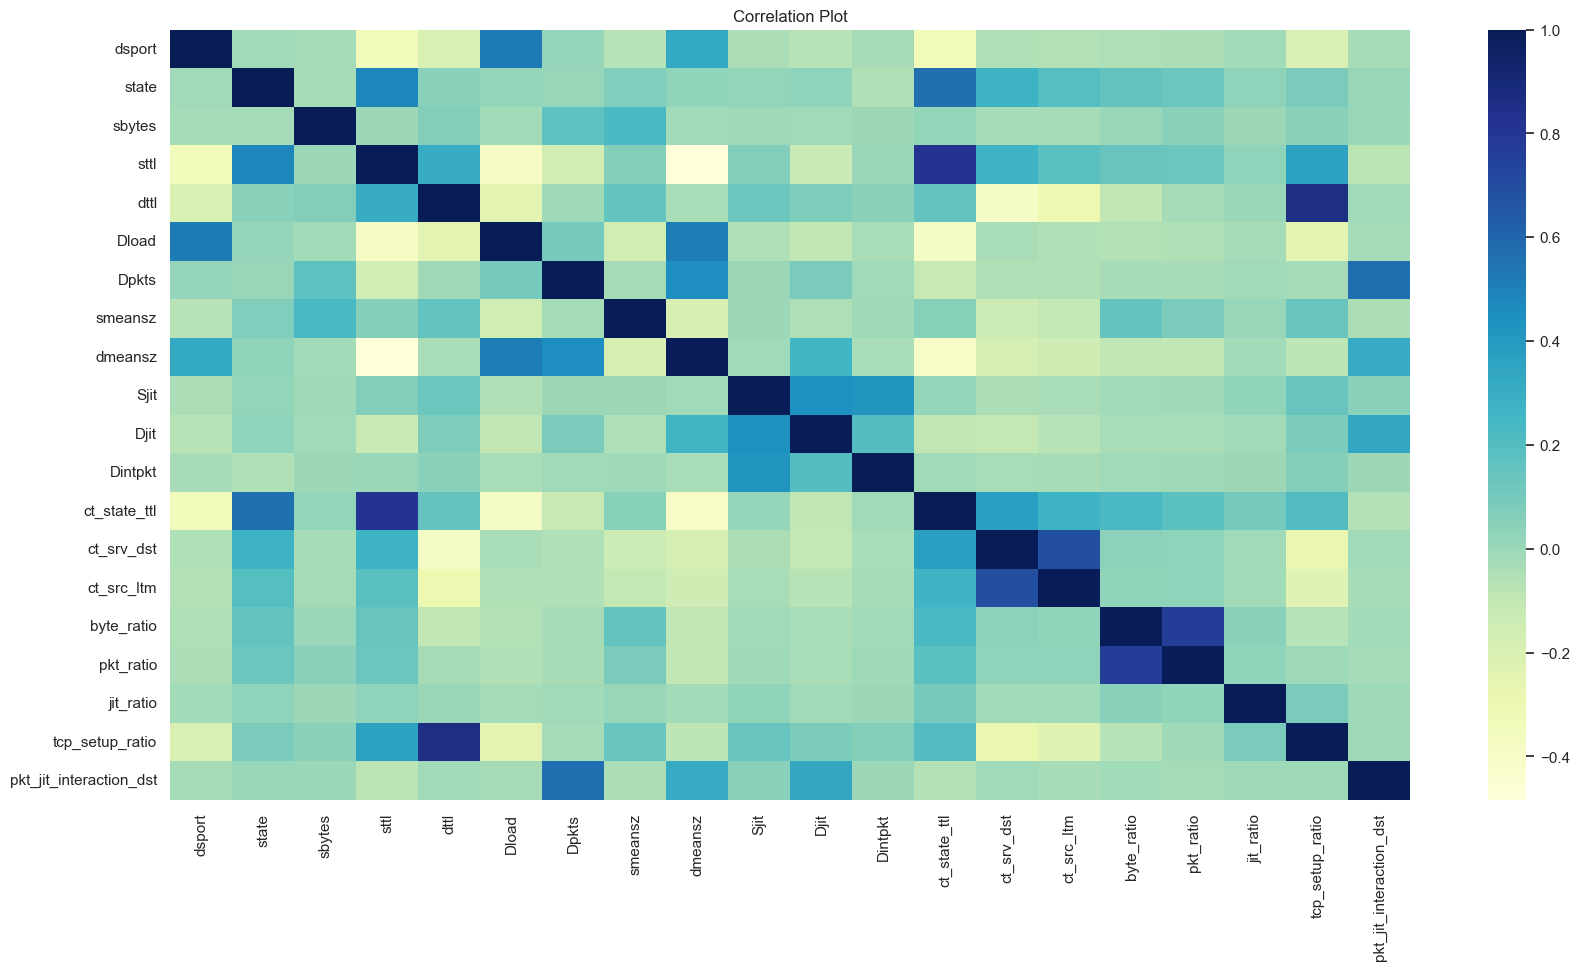

In [87]:
plt.figure(figsize=(20,10))
plt.title("Correlation Plot")
sns.heatmap(x.corr(),cmap='YlGnBu')

## Saving the resampled data to CSV files before scaling, to be reused in the training scripts


In [88]:
x.to_csv('x_resampled.csv', index=False)
y.to_csv('y_resampled.csv', index=False)

## Feature Scaling


In [89]:
# # Standardize the features
# scaler = StandardScaler()
# x_scaled = scaler.fit_transform(x)


## Checking Variance captured by features

In [90]:
# pca = PCA()
# pca.fit(x)  

# explained_variance_ratio = pca.explained_variance_ratio_
# cumulative_variance_ratio = explained_variance_ratio.cumsum()

# plt.plot(cumulative_variance_ratio)
# plt.xlabel('Number of Components')
# plt.ylabel('Cumulative Explained Variance')
# plt.show()


In [91]:
# rows, columns = x.shape
# print(f"Number of rows: {rows}")
# print(f"Number of columns: {columns}")
# print("1 and 0 distribution:", y.value_counts())



<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown> 🔍 Inference:</font></h3>

* No need to apply pca as all thw features are capturing full variance

<a id='4.9'></a>
#  Dividing in train-test split

In [92]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_val_scaled = scaler.transform(x_val)

# Save the scaler to a file
scaler_path = "scaler.joblib"
joblib.dump(scaler, scaler_path)


['scaler.joblib']

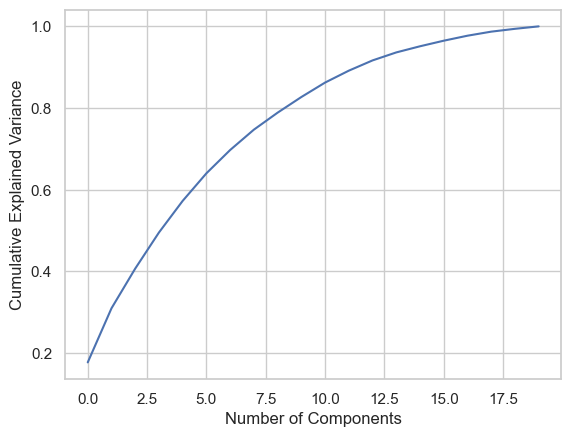

In [93]:
pca = PCA()
pca.fit(x_train_scaled)  

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = explained_variance_ratio.cumsum()

plt.plot(cumulative_variance_ratio)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()


In [94]:
rows, columns = x_train_scaled.shape
print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}")
print("1 and 0 distribution:", y_val.value_counts())

Number of rows: 140800
Number of columns: 20
1 and 0 distribution: Label
1        17615
0        17585
Name: count, dtype: int64


### Code Metrics

Imports the libraries that will be used to evaluate the models later on

In [95]:
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from sklearn.metrics import confusion_matrix # will plot the confusion matrix
import time



model_performance = pd.DataFrame(columns=['Accuracy','Recall','Precision','F1-Score','Mean Absolute Error','time to train','time to predict','total time'])

def train_evaluate_model(model, x_train_scaled, y_train, x_val_scaled, y_val):
    start = time.time()
    model.fit(x_train_scaled, y_train)
    end_train = time.time()

    preds = model.predict(x_val_scaled)
    end_predict = time.time()

    accuracy = accuracy_score(y_val, preds)
    recall = recall_score(y_val, preds)
    precision = precision_score(y_val, preds)
    f1s = f1_score(y_val, preds)
    mae = mean_absolute_error(y_val, preds)

    print(f"Accuracy: {accuracy:.2%}")
    print(f"Recall: {recall:.2%}")
    print(f"Precision: {precision:.2%}")
    print(f"F1-Score: {f1s:.2%}")
    print(f"Mean Absolute Error: {mae:.2%}")
    print(f"time to train: {end_train-start:.2f} s")
    print(f"time to predict: {end_predict-end_train:.2f} s")
    print(f"total: {end_predict-start:.2f} s")
    
    model_performance.loc[type(model).__name__] = [accuracy, recall, precision, f1s, mae , end_train-start, end_predict-end_train, end_predict-start]

    print(f"Classification Report:\n{classification_report(y_val, preds)}")
    cm = confusion_matrix(y_val, preds)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

<a id='5'></a>
# 5 | Model Building


<a id='5.1'></a>
## Decision Tree Model


Before we make our Random Forest, we'll see if we can signficantly improve our performance with merely a decision tree.

Accuracy: 98.61%
Recall: 98.52%
Precision: 98.70%
F1-Score: 98.61%
Mean Absolute Error: 1.39%
time to train: 1.50 s
time to predict: 0.01 s
total: 1.50 s
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     17585
           1       0.99      0.99      0.99     17615

    accuracy                           0.99     35200
   macro avg       0.99      0.99      0.99     35200
weighted avg       0.99      0.99      0.99     35200



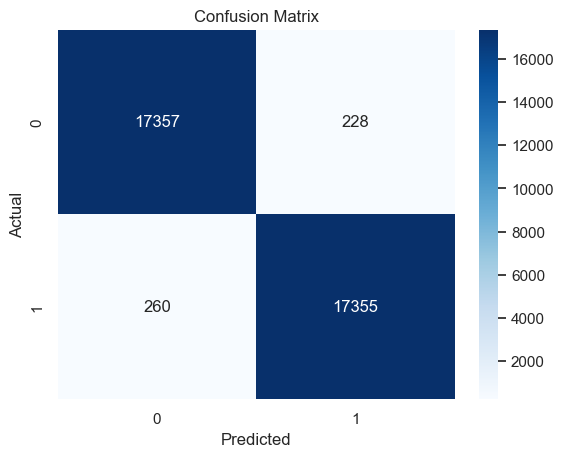

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [96]:
import re
import graphviz
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import GridSearchCV
import joblib


# Train and evaluate Decision Tree
dt = DecisionTreeClassifier()
train_evaluate_model(dt, x_train_scaled, y_train, x_val_scaled, y_val)

# Check if the directory exists, if not, create it
model_dir = 'model'
if not os.path.exists(model_dir):
    os.makedirs(model_dir)
    
joblib.dump(dt, os.path.join(model_dir, 'decision_tree_model.joblib'))

# Function to draw the decision tree
def draw_tree(t, df, size=10, ratio=0.6, precision=2, **kwargs):
    feature_names = df.columns if hasattr(df, 'columns') else [f'feature_{i}' for i in range(df.shape[1])]
    s = export_graphviz(t, out_file=None, feature_names=feature_names, filled=True, rounded=True,
                        special_characters=True, precision=precision, **kwargs)
    return graphviz.Source(re.sub('Tree {', f'Tree {{ size={size}; ratio={ratio}', s))
# Draw the decision tree
draw_tree(dt, x_train_scaled, size=10)



<a id='5.2'></a>
## Random Forest Model


Accuracy: 99.18%
Recall: 99.89%
Precision: 98.51%
F1-Score: 99.19%
Mean Absolute Error: 0.82%
time to train: 7.57 s
time to predict: 0.08 s
total: 7.65 s
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     17585
           1       0.99      1.00      0.99     17615

    accuracy                           0.99     35200
   macro avg       0.99      0.99      0.99     35200
weighted avg       0.99      0.99      0.99     35200



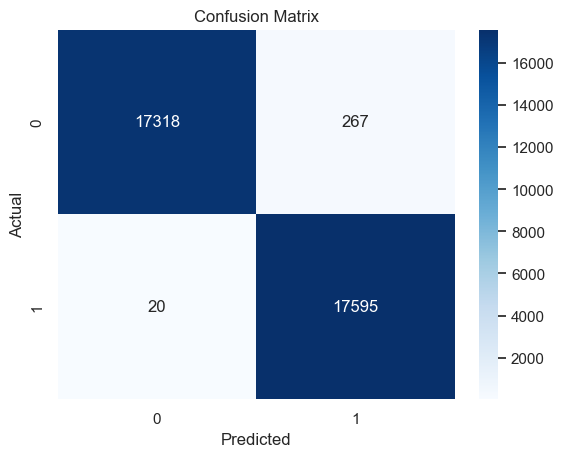

['model\\random_forest_model.joblib']

In [97]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV

# Train and evaluate Random Forest
rf = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0, bootstrap=True)
train_evaluate_model(rf, x_train_scaled, y_train, x_val_scaled, y_val)

# Check if the directory exists, if not, create it
model_dir = 'model'
if not os.path.exists(model_dir):
    os.makedirs(model_dir)
    
joblib.dump(rf, os.path.join(model_dir, 'random_forest_model.joblib'))



<a id='5.3'></a>
## Gradient Boosting Model

Accuracy: 99.22%
Recall: 99.99%
Precision: 98.47%
F1-Score: 99.23%
Mean Absolute Error: 0.78%
time to train: 54.28 s
time to predict: 0.06 s
total: 54.34 s
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     17585
           1       0.98      1.00      0.99     17615

    accuracy                           0.99     35200
   macro avg       0.99      0.99      0.99     35200
weighted avg       0.99      0.99      0.99     35200



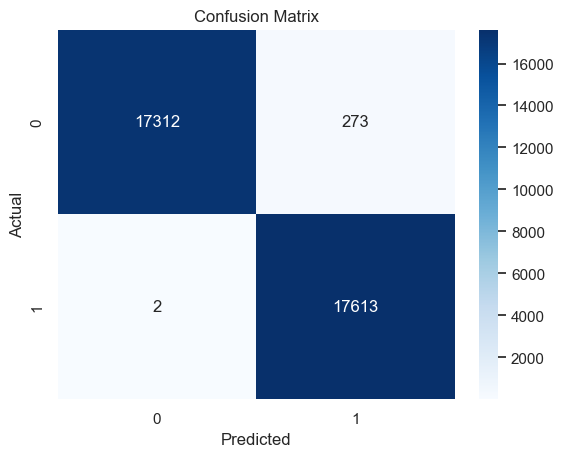

['model\\gradient_boosting_model.joblib']

In [98]:
from sklearn.ensemble import GradientBoostingClassifier

# Train and evaluate Gradient Boosting Classifier
gbm = GradientBoostingClassifier(random_state=42)
train_evaluate_model(gbm, x_train_scaled, y_train, x_val_scaled, y_val)

# Check if the directory exists, if not, create it
model_dir = 'model'
if not os.path.exists(model_dir):
    os.makedirs(model_dir)
    
joblib.dump(gbm, os.path.join(model_dir, 'gradient_boosting_model.joblib'))


<a id='5.4'></a>
## Logistic Regression Model

Accuracy: 98.88%
Recall: 99.60%
Precision: 98.19%
F1-Score: 98.89%
Mean Absolute Error: 1.12%
time to train: 0.48 s
time to predict: 0.00 s
total: 0.48 s
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     17585
           1       0.98      1.00      0.99     17615

    accuracy                           0.99     35200
   macro avg       0.99      0.99      0.99     35200
weighted avg       0.99      0.99      0.99     35200



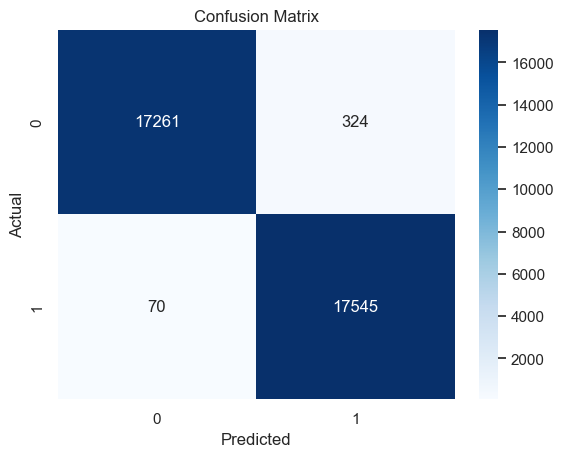

['model\\logistic_regression_model.joblib']

In [99]:
from sklearn.linear_model import LogisticRegression

# Train and evaluate Logistic Regression
lr = LogisticRegression()
train_evaluate_model(lr, x_train_scaled, y_train, x_val_scaled, y_val)


# Check if the directory exists, if not, create it
model_dir = 'model'
if not os.path.exists(model_dir):
    os.makedirs(model_dir)
    
joblib.dump(lr, os.path.join(model_dir, 'logistic_regression_model.joblib'))


<a id='5.5'></a>
## KNeighbors Classifier model

Accuracy: 99.07%
Recall: 99.68%
Precision: 98.49%
F1-Score: 99.08%
Mean Absolute Error: 0.93%
time to train: 0.03 s
time to predict: 12.59 s
total: 12.62 s
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     17585
           1       0.98      1.00      0.99     17615

    accuracy                           0.99     35200
   macro avg       0.99      0.99      0.99     35200
weighted avg       0.99      0.99      0.99     35200



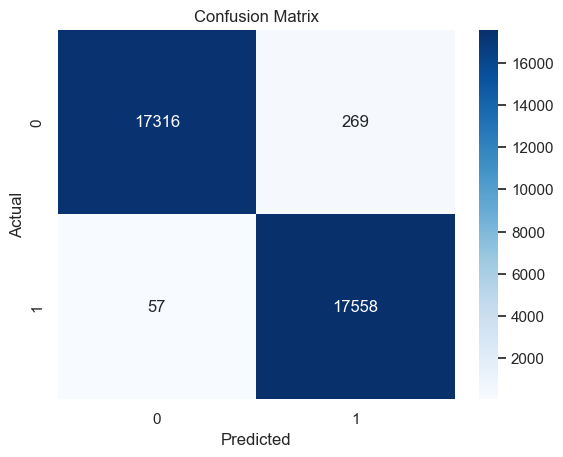

['model\\kneighbors_model.joblib']

In [100]:
from sklearn.neighbors import KNeighborsClassifier


# Train and evaluate KNeighbors Classifier
kn = KNeighborsClassifier(n_neighbors=3)
train_evaluate_model(kn, x_train_scaled, y_train, x_val_scaled, y_val)

# Check if the directory exists, if not, create it
model_dir = 'model'
if not os.path.exists(model_dir):
    os.makedirs(model_dir)
    
joblib.dump(kn, os.path.join(model_dir, 'kneighbors_model.joblib'))


<a id='5.6'></a>
## Extra Trees Model


Accuracy: 99.15%
Recall: 99.81%
Precision: 98.52%
F1-Score: 99.16%
Mean Absolute Error: 0.85%
time to train: 3.71 s
time to predict: 0.13 s
total: 3.83 s
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     17585
           1       0.99      1.00      0.99     17615

    accuracy                           0.99     35200
   macro avg       0.99      0.99      0.99     35200
weighted avg       0.99      0.99      0.99     35200



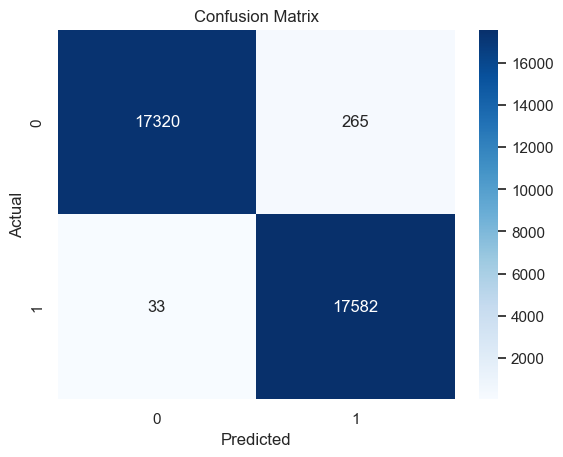

['model\\extra_trees_model.joblib']

In [101]:
from sklearn.ensemble import ExtraTreesClassifier

# Train and evaluate Extra Trees
et = ExtraTreesClassifier(random_state=42, n_jobs=-1)
train_evaluate_model(et, x_train_scaled, y_train, x_val_scaled, y_val)

# Check if the directory exists, if not, create it
model_dir = 'model'
if not os.path.exists(model_dir):
    os.makedirs(model_dir)
    
joblib.dump(et, os.path.join(model_dir, 'extra_trees_model.joblib'))


<a id='5.7'></a>
## SVM model (SGDClassifier)

Accuracy: 98.72%
Recall: 99.60%
Precision: 97.87%
F1-Score: 98.73%
Mean Absolute Error: 1.28%
time to train: 0.44 s
time to predict: 0.00 s
total: 0.44 s
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     17585
           1       0.98      1.00      0.99     17615

    accuracy                           0.99     35200
   macro avg       0.99      0.99      0.99     35200
weighted avg       0.99      0.99      0.99     35200



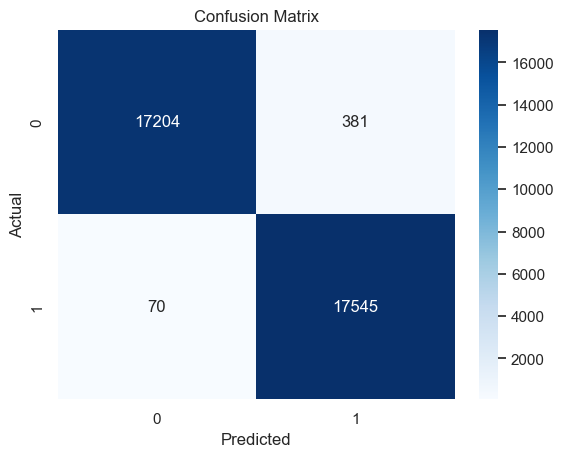

['model\\sgdc_svm_model.joblib']

In [102]:
from sklearn.linear_model import SGDClassifier

# Train and evaluate SVM with SGD Classifier
sgdc_svm = SGDClassifier(loss='hinge', random_state=42)
train_evaluate_model(sgdc_svm, x_train_scaled, y_train, x_val_scaled, y_val)

# Check if the directory exists, if not, create it
model_dir = 'model'
if not os.path.exists(model_dir):
    os.makedirs(model_dir)
    
joblib.dump(sgdc_svm, os.path.join(model_dir, 'sgdc_svm_model.joblib'))


<a id='5.8'></a>
## SVM model (SVC)

Accuracy: 98.82%
Recall: 99.61%
Precision: 98.06%
F1-Score: 98.83%
Mean Absolute Error: 1.18%
time to train: 1.68 s
time to predict: 0.00 s
total: 1.69 s
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     17585
           1       0.98      1.00      0.99     17615

    accuracy                           0.99     35200
   macro avg       0.99      0.99      0.99     35200
weighted avg       0.99      0.99      0.99     35200



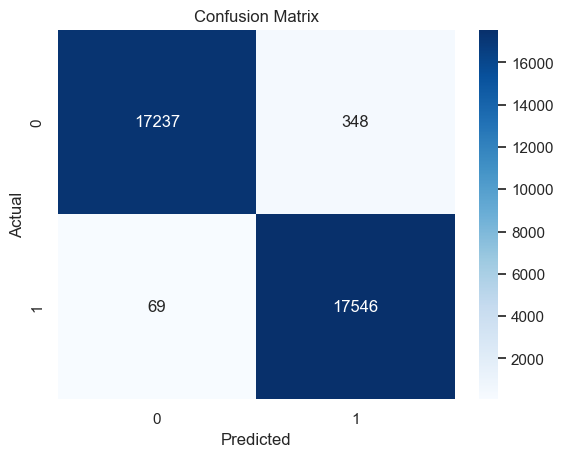

['model\\svc_svm_model.joblib']

In [103]:
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

# Train and evaluate SVM with SVC Classifier
svc_svm = LinearSVC()
train_evaluate_model(svc_svm, x_train_scaled, y_train, x_val_scaled, y_val)

# Check if the directory exists, if not, create it
model_dir = 'model'
if not os.path.exists(model_dir):
    os.makedirs(model_dir)
    
joblib.dump(svc_svm, os.path.join(model_dir, 'svc_svm_model.joblib'))

<a id='5.9'></a>
## SVM model (OneClassSVM) - Unsupervised

An unsupervised model trained on normal packet data. Aimed to identify only what is considered normal. I will work in conjunction with the ensemble classifier model to identify normal or attack packets.

In [104]:
# x_test_ocsvm = x_val
# y_test_ocsvm = y_val  

y_val.value_counts()

Label
1        17615
0        17585
Name: count, dtype: int64

In [105]:
x_train_ocsvm.shape

(391870, 20)

In [106]:
y_val.shape

(35200, 1)

In [107]:
x_val.shape

(35200, 20)

In [108]:
# Standardize the features
scaler = StandardScaler()
x_train_ocsvm_scaled = scaler.fit_transform(x_train_ocsvm)
x_test_ocsvm_scaled = scaler.transform(x_val)    

Function to train and evaluate the One-Class SVM model

In [109]:
# Define the train and evaluate function for One-Class SVM
def train_evaluate_ocsvm(model, x_train_ocsvm_scaled, x_test_ocsvm_scaled, y_val):
    start = time.time()
    model.fit(x_train_ocsvm_scaled)
    end_train = time.time()

    # Predicting the anomalies
    preds = model.predict(x_test_ocsvm_scaled)
    end_predict = time.time()
    
    # Adjust predictions: +1 -> 0 (normal), -1 -> 1 (anomaly)
    preds = np.where(preds == 1, 0, 1)

    accuracy = accuracy_score(y_val, preds)    
    recall = recall_score(y_val, preds)
    precision = precision_score(y_val, preds)
    f1s = f1_score(y_val, preds)
    mae = mean_absolute_error(y_val, preds)

    print(f"Accuracy: {accuracy:.2%}")
    print(f"Recall: {recall:.2%}")
    print(f"Precision: {precision:.2%}")
    print(f"F1-Score: {f1s:.2%}")
    print(f"Mean Absolute Error: {mae:.2%}")
    print(f"time to train: {end_train-start:.2f} s")
    print(f"time to predict: {end_predict-end_train:.2f} s")
    print(f"total: {end_predict-start:.2f} s")
    
    model_performance.loc['SVM model (OneClassSVM)'] = [accuracy, recall, precision, f1s, mae , end_train-start, end_predict-end_train, end_predict-start]

    # Print classification report and plot confusion matrix
    print(f"Classification Report:\n{classification_report(y_val, preds)}")
    cm = confusion_matrix(y_val, preds)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

The One-Class SVM model is trained on the normal data (label 0) only. The model is then evaluated on the validation set, and the performance metrics are calculated.

In [110]:
from sklearn.svm import OneClassSVM
from sklearn.model_selection import GridSearchCV
from skopt import BayesSearchCV
from skopt.space import Real, Categorical
from sklearn.metrics import make_scorer, accuracy_score


# # Ensure reproducibility
# np.random.seed(42)

# # Randomly sample rows from x_train_ocsvm_scaled to match the number of rows in y_val
# sample_indices = np.random.choice(x_train_ocsvm_scaled.shape[0], size=y_val.shape[0], replace=False)
# x_train_temp = x_train_ocsvm_scaled[sample_indices, :]  # Maintain all 20 columns

# # Define the parameter space for Bayesian search
# param_space = {
#     'nu': Real(0.01, 0.09, prior='uniform'),
#     'gamma': Categorical(['scale', 'auto']),
#     'kernel': Categorical(['linear', 'rbf','sigmoid'])
# }

# # Define a custom scoring function
# def custom_scorer(y_true, y_pred):
#     # Adjust predictions: +1 -> 0 (normal), -1 -> 1 (anomaly)
#     y_pred = np.where(y_pred == 1, 0, 1)
#     return accuracy_score(y_true, y_pred)

# # Wrap the custom_scorer to be compatible with BayesSearchCV
# def scoring_function(estimator, X, y):
#     y_pred = estimator.predict(X)
#     return custom_scorer(y, y_pred)

# # Initialize the One-Class SVM
# oc_svm = OneClassSVM()

# # Initialize Bayesian Search with the custom scoring function
# bayes_search = BayesSearchCV(
#     estimator=oc_svm,
#     search_spaces=param_space,
#     n_iter=20,  # Number of parameter settings sampled
#     scoring=scoring_function,  # Use the wrapped custom scorer
#     cv=[(slice(None), slice(None))],  # Dummy cross-validation
#     n_jobs=-1,
#     random_state=42
# )

# # Perform Bayesian search using the temporary training set
# bayes_search.fit(x_train_temp, y_val)

# # Get the best parameters and the corresponding accuracy
# best_params = bayes_search.best_params_
# best_score = bayes_search.best_score_

# print(f"Best Parameters: {best_params}")
# print(f"Best Accuracy: {best_score:.2%}")


Accuracy: 72.52%
Recall: 92.13%
Precision: 66.20%
F1-Score: 77.04%
Mean Absolute Error: 27.48%
time to train: 44.24 s
time to predict: 2.73 s
total: 46.97 s
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.53      0.66     17585
           1       0.66      0.92      0.77     17615

    accuracy                           0.73     35200
   macro avg       0.77      0.73      0.71     35200
weighted avg       0.77      0.73      0.71     35200



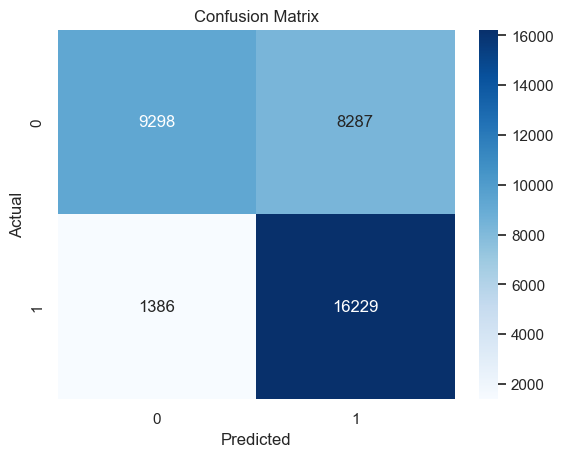

['model\\one_class_svm_model.joblib']

In [111]:
# Initialize the One-Class SVM
oc_svm = OneClassSVM(
    nu=0.01,
    gamma='auto',
    kernel='linear'
)

# Train and evaluate One Class SVM
train_evaluate_ocsvm(oc_svm, x_train_ocsvm_scaled , x_test_ocsvm_scaled , y_val)

# Check if the directory exists, if not, create it
model_dir = 'model'
if not os.path.exists(model_dir):
    os.makedirs(model_dir)
    
joblib.dump(oc_svm, os.path.join(model_dir, 'one_class_svm_model.joblib'))

In [112]:
# # Cross-validation
# scores = cross_val_score(best_oc_svm, x_train_ocsvm_scaled, y_train_ocsvm, cv=5, scoring='accuracy')
# print(f"Cross-validation scores: {scores}")
# print(f"Mean cross-validation score: {scores.mean()}")

<a id='5.10'></a>
## Summary and Classifier Ensemble


In [113]:
# Define the classifier ensemble
from sklearn.ensemble import VotingClassifier

ensemble_model = VotingClassifier(estimators=[
    ('decision_tree', dt),
    ('random_forest', rf),
    ('gradient_boosting', gbm),
    ('logistic_regression', lr),
    ('kneighbors', kn),
    ('extra_trees', et),
    ('sgdc_svm', sgdc_svm),
    ('svc_svm', svc_svm)
], voting='hard')

# Fit the ensemble model on the training data
start = time.time()
ensemble_model.fit(x_train_scaled, y_train)
end_train = time.time()

# Save the ensemble model
# Create a directory to save the models if it doesn't exist
model_dir = 'model'
if not os.path.exists(model_dir):
    os.makedirs(model_dir)
ensemble_model_path = os.path.join(model_dir, 'classifier_ensemble_model.joblib')
joblib.dump(ensemble_model, ensemble_model_path)
print(f"Classifier ensemble model saved at {ensemble_model_path}")

# Make predictions with the ensemble model
ensemble_preds_val = ensemble_model.predict(x_val_scaled)
end_predict = time.time()

Classifier ensemble model saved at model\classifier_ensemble_model.joblib


## Ensemble Final Statistics

In [114]:
# Calculate metrics for the ensemble model
accuracy = accuracy_score(y_val, ensemble_preds_val)
recall = recall_score(y_val, ensemble_preds_val, average='weighted')
precision = precision_score(y_val, ensemble_preds_val, average='weighted')
f1s = f1_score(y_val, ensemble_preds_val, average='weighted')
mae = mean_absolute_error(y_val, ensemble_preds_val)

# Print metrics
print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("MAE: "+ "{:.2%}".format(mae))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['Ensemble (without OC)'] = [accuracy, recall, precision, f1s, mae, end_train-start, end_predict-end_train, end_predict-start]


Accuracy: 99.22%
Recall: 99.22%
Precision: 99.23%
F1-Score: 99.22%
MAE: 0.78%
time to train: 68.81 s
time to predict: 13.28 s
total: 82.09 s


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     17585
           1       0.98      1.00      0.99     17615

    accuracy                           0.99     35200
   macro avg       0.99      0.99      0.99     35200
weighted avg       0.99      0.99      0.99     35200



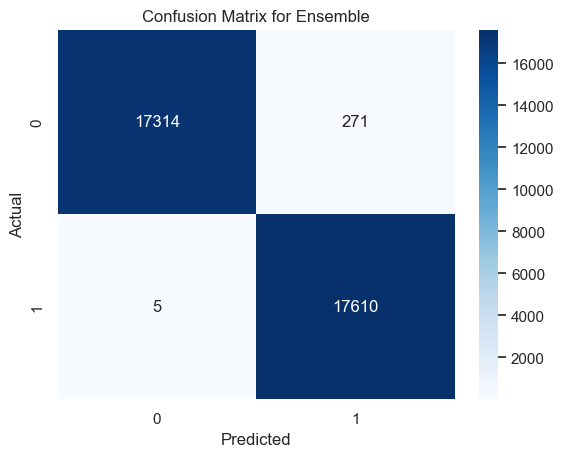

In [115]:
# Display classification report and confusion matrix
print(f"Classification Report:\n{classification_report(y_val, ensemble_preds_val)}")
cm = confusion_matrix(y_val, ensemble_preds_val)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Ensemble')
plt.show()

-- Classifier models are best for well-defined, labeled datasets.

-- Anomaly detection models are best for identifying outliers in predominantly normal datasets.

-- Combining both can leverage the strengths of each, providing a robust solution for detecting both known and unknown attacks in packet traffic.

<a id='6'></a>
# 6 | Final Metrics

Finally, all models are compared alongside the ensemble in the following table

In [116]:
model_performance.style.background_gradient(cmap='coolwarm').format({'Accuracy': '{:.2%}',
                                                                     'Precision': '{:.2%}',
                                                                     'Recall': '{:.2%}',
                                                                     'F1-Score': '{:.2%}',
                                                                     'MAE': '{:.2%}',
                                                                     'time to train':'{:.1f}',
                                                                     'time to predict':'{:.1f}',
                                                                     'total time':'{:.1f}',
                                                                     })

,Accuracy,Recall,Precision,F1-Score,Mean Absolute Error,time to train,time to predict,total time
DecisionTreeClassifier,98.61%,98.52%,98.70%,98.61%,0.013864,1.5,0.0,1.5
RandomForestClassifier,99.18%,99.89%,98.51%,99.19%,0.008153,7.6,0.1,7.7
GradientBoostingClassifier,99.22%,99.99%,98.47%,99.23%,0.007812,54.3,0.1,54.3
LogisticRegression,98.88%,99.60%,98.19%,98.89%,0.011193,0.5,0.0,0.5
KNeighborsClassifier,99.07%,99.68%,98.49%,99.08%,0.009261,0.0,12.6,12.6
ExtraTreesClassifier,99.15%,99.81%,98.52%,99.16%,0.008466,3.7,0.1,3.8
SGDClassifier,98.72%,99.60%,97.87%,98.73%,0.012812,0.4,0.0,0.4
LinearSVC,98.82%,99.61%,98.06%,98.83%,0.011847,1.7,0.0,1.7
SVM model (OneClassSVM),72.52%,92.13%,66.20%,77.04%,0.274801,44.2,2.7,47.0
Ensemble (without OC),99.22%,99.22%,99.23%,99.22%,0.007841,68.8,13.3,82.1


## Cross-validated accuracy

In [117]:
from sklearn.model_selection import cross_val_score

# Cross-validated scores
dt_scores = cross_val_score(dt, x_resampled, y_resampled.values.ravel(), cv=2, scoring='accuracy')
print(f"Decision Tree cross-validated accuracy: {dt_scores.mean():.2%}")

rf_scores = cross_val_score(rf, x_resampled, y_resampled.values.ravel(), cv=2, scoring='accuracy')
print(f"Random Forest cross-validated accuracy: {rf_scores.mean():.2%}")

gbm_scores = cross_val_score(gbm, x_resampled, y_resampled.values.ravel(), cv=2, scoring='accuracy')
print(f"Gradient Boosting cross-validated accuracy: {gbm_scores.mean():.2%}")

lr_scores = cross_val_score(lr, x_resampled, y_resampled.values.ravel(), cv=2, scoring='accuracy')
print(f"Logistic Regression cross-validated accuracy: {lr_scores.mean():.2%}")

kn_scores = cross_val_score(kn, x_resampled, y_resampled.values.ravel(), cv=2, scoring='accuracy')
print(f"kNeighbours cross-validated accuracy: {kn_scores.mean():.2%}")

et_scores = cross_val_score(et, x_resampled, y_resampled.values.ravel(), cv=2, scoring='accuracy')
print(f"Extra Trees cross-validated accuracy: {et_scores.mean():.2%}")

sgdc_svm_scores = cross_val_score(sgdc_svm, x_resampled, y_resampled.values.ravel(), cv=2, scoring='accuracy')
print(f"SGD SVM cross-validated accuracy: {sgdc_svm_scores.mean():.2%}")

svc_svm_scores = cross_val_score(svc_svm, x_resampled, y_resampled.values.ravel(), cv=2, scoring='accuracy')
print(f"SVC SVM cross-validated accuracy: {svc_svm_scores.mean():.2%}")

Decision Tree cross-validated accuracy: 98.65%
Random Forest cross-validated accuracy: 99.25%
Gradient Boosting cross-validated accuracy: 99.24%
Logistic Regression cross-validated accuracy: 83.80%
kNeighbours cross-validated accuracy: 95.48%
Extra Trees cross-validated accuracy: 99.23%
SGD SVM cross-validated accuracy: 62.26%
SVC SVM cross-validated accuracy: 83.58%


<a id='7'></a>
# Keras Models

<a id='7.1'></a>
## Neural Network MLP (Keras)

In [118]:
#Import libraries that will allow you to use keras
import tensorflow.keras.backend as K
import keras
from keras import layers
from keras import metrics
import numpy as np
from numpy import array
from sklearn.model_selection import train_test_split
import time

In [119]:
# Custom metric functions
def recall_m(y_true, y_pred):
    y_true = K.cast(y_true, 'float32')  # Cast y_true to float32
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    y_true = K.cast(y_true, 'float32')  # Cast y_true to float32
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2 * ((precision * recall) / (precision + recall + K.epsilon()))

def mae_m(y_true, y_pred):
    y_true = K.cast(y_true, 'float32')  # Cast y_true to float32
    y_pred = K.cast(y_pred, 'float32')  # Cast y_pred to float32
    return K.mean(K.abs(y_pred - y_true))

In [120]:
# Build the feed-forward neural network model
def build_model():
    model = keras.Sequential()
    model.add(layers.Dense(20, input_dim=20, activation='relu'))  # Input layer
    model.add(layers.Dense(20, activation='relu'))  # Hidden layer
    model.add(layers.Dense(1, activation='sigmoid'))  # Output layer for binary classification
    # Compile the model
    model.compile(loss='binary_crossentropy', optimizer='adam',
                  metrics=['accuracy', f1_m, precision_m, recall_m, mae_m])
    return model

# Instantiate the model
model = build_model()

# Fit the model
start = time.time()
model.fit(x_train_scaled, y_train, epochs=200, batch_size=2000, verbose=2)
end_train = time.time()

Epoch 1/200
71/71 - 2s - 26ms/step - accuracy: 0.9309 - f1_m: 0.9319 - loss: 0.3643 - mae_m: 0.2740 - precision_m: 0.9357 - recall_m: 0.9288
Epoch 2/200
71/71 - 0s - 2ms/step - accuracy: 0.9845 - f1_m: 0.9846 - loss: 0.1066 - mae_m: 0.0678 - precision_m: 0.9801 - recall_m: 0.9892
Epoch 3/200
71/71 - 0s - 2ms/step - accuracy: 0.9881 - f1_m: 0.9882 - loss: 0.0692 - mae_m: 0.0325 - precision_m: 0.9822 - recall_m: 0.9943
Epoch 4/200
71/71 - 0s - 2ms/step - accuracy: 0.9886 - f1_m: 0.9887 - loss: 0.0595 - mae_m: 0.0254 - precision_m: 0.9823 - recall_m: 0.9952
Epoch 5/200
71/71 - 0s - 2ms/step - accuracy: 0.9889 - f1_m: 0.9890 - loss: 0.0541 - mae_m: 0.0229 - precision_m: 0.9823 - recall_m: 0.9957
Epoch 6/200
71/71 - 0s - 2ms/step - accuracy: 0.9903 - f1_m: 0.9904 - loss: 0.0504 - mae_m: 0.0214 - precision_m: 0.9827 - recall_m: 0.9983
Epoch 7/200
71/71 - 0s - 3ms/step - accuracy: 0.9907 - f1_m: 0.9907 - loss: 0.0476 - mae_m: 0.0205 - precision_m: 0.9828 - recall_m: 0.9988
Epoch 8/200
71/71 -

In [121]:
# Evaluate the model
loss, accuracy, f1s, precision, recall, mae = model.evaluate(x_val_scaled, y_val)
end_predict = time.time()

# Record the performance in the DataFrame
model_performance.loc['MLP (Keras)'] = [accuracy, recall, precision, f1s, mae, end_train-start, end_predict-end_train, end_predict-start]


1100/1100 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9919 - f1_m: 0.9918 - loss: 0.0321 - mae_m: 0.0152 - precision_m: 0.9845 - recall_m: 0.9997


In [122]:
import os
model_directory = "model"
if not os.path.exists(model_directory):
    os.makedirs(model_directory)
model_path = os.path.join(model_directory, "nnkeras.keras")
model.save(model_path)


<a id='7.2'></a>
## GRU (Keras)

In [123]:
from keras.layers import GRU, Dense
from keras.models import Sequential
import numpy as np

# Build the neural network model
def build_model():
    model = Sequential()
    model.add(GRU(20, return_sequences=True, input_shape=(1, 20)))
    model.add(GRU(20, return_sequences=False))  # Set return_sequences=False for the last GRU layer
    model.add(Dense(1, activation='sigmoid'))  # For binary classification
    # Compile the model
    model.compile(loss='binary_crossentropy', optimizer='adam',
                  metrics=['accuracy'])
    return model

# The GRU input layer must be 3D.
# The meaning of the 3 input dimensions are: samples, time steps, and features.

# Reshape input data
X_train_array = np.array(x_train_scaled)
X_train_reshaped = X_train_array.reshape(X_train_array.shape[0], 1, 20)

# Reshape validation data
X_test_array = np.array(x_val_scaled)
X_test_reshaped = X_test_array.reshape(X_test_array.shape[0], 1, 20)

# Instantiate the model
model = build_model()

start = time.time()
# Fit the model
model.fit(X_train_reshaped, y_train, epochs=200, batch_size=2000, verbose=2)
end_train = time.time()


Epoch 1/200
71/71 - 5s - 67ms/step - accuracy: 0.9506 - loss: 0.4748
Epoch 2/200
71/71 - 0s - 6ms/step - accuracy: 0.9822 - loss: 0.1321
Epoch 3/200
71/71 - 0s - 6ms/step - accuracy: 0.9876 - loss: 0.0668
Epoch 4/200
71/71 - 0s - 6ms/step - accuracy: 0.9883 - loss: 0.0565
Epoch 5/200
71/71 - 0s - 6ms/step - accuracy: 0.9888 - loss: 0.0515
Epoch 6/200
71/71 - 0s - 6ms/step - accuracy: 0.9892 - loss: 0.0479
Epoch 7/200
71/71 - 0s - 6ms/step - accuracy: 0.9903 - loss: 0.0455
Epoch 8/200
71/71 - 1s - 7ms/step - accuracy: 0.9908 - loss: 0.0437
Epoch 9/200
71/71 - 1s - 8ms/step - accuracy: 0.9912 - loss: 0.0424
Epoch 10/200
71/71 - 1s - 8ms/step - accuracy: 0.9912 - loss: 0.0413
Epoch 11/200
71/71 - 1s - 8ms/step - accuracy: 0.9913 - loss: 0.0404
Epoch 12/200
71/71 - 0s - 7ms/step - accuracy: 0.9913 - loss: 0.0395
Epoch 13/200
71/71 - 0s - 7ms/step - accuracy: 0.9914 - loss: 0.0388
Epoch 14/200
71/71 - 1s - 11ms/step - accuracy: 0.9914 - loss: 0.0381
Epoch 15/200
71/71 - 0s - 6ms/step - accu

In [124]:
loss, accuracy = model.evaluate(X_test_reshaped, y_val)
# loss, accuracy, f1s, precision, recall = model.evaluate(X_test_reshaped, y_test)
end_predict = time.time()
model_performance.loc['GRU (Keras)'] = [accuracy, accuracy, accuracy, accuracy,accuracy, end_train-start,end_predict-end_train,end_predict-start]

1100/1100 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9918 - loss: 0.0323


In [125]:
np.shape(X_train_reshaped)

(140800, 1, 20)

In [126]:
import os
model_directory = "model"
if not os.path.exists(model_directory):
    os.makedirs(model_directory)
model_path = os.path.join(model_directory, "grukeras.keras")
model.save(model_path)

<a id='7.3'></a>
## LSTM (Keras)

In [127]:
from keras.layers import LSTM, Dense
from keras.models import Sequential
import numpy as np

def build_model():
    model = Sequential()
    model.add(LSTM(20, return_sequences=True, input_shape=(1, 20)))
    model.add(LSTM(20, return_sequences=False))  # Set return_sequences=False for the last LSTM layer
    model.add(Dense(1, activation='sigmoid'))  # Use 1 neuron and sigmoid activation for binary classification
    # Compile the model
    model.compile(loss='binary_crossentropy', optimizer='adam',
                  metrics=['accuracy'])
    return model

# The LSTM input layer must be 3D.
# The meaning of the 3 input dimensions are: samples, time steps, and features.

# Reshape input data
X_train_array = np.array(x_train_scaled)
X_train_reshaped = X_train_array.reshape(X_train_array.shape[0], 1, 20)

# Reshape validation data
X_test_array = np.array(x_val_scaled)
X_test_reshaped = X_test_array.reshape(X_test_array.shape[0], 1, 20)

# Instantiate the model
model = build_model()

# Fit the model
start = time.time()
model.fit(X_train_reshaped, y_train, epochs=200, batch_size=2000, verbose=2)
end_train = time.time()


Epoch 1/200
71/71 - 5s - 65ms/step - accuracy: 0.9107 - loss: 0.6335
Epoch 2/200
71/71 - 0s - 5ms/step - accuracy: 0.9784 - loss: 0.3329
Epoch 3/200
71/71 - 0s - 5ms/step - accuracy: 0.9872 - loss: 0.1106
Epoch 4/200
71/71 - 0s - 5ms/step - accuracy: 0.9881 - loss: 0.0701
Epoch 5/200
71/71 - 0s - 5ms/step - accuracy: 0.9888 - loss: 0.0601
Epoch 6/200
71/71 - 0s - 6ms/step - accuracy: 0.9890 - loss: 0.0547
Epoch 7/200
71/71 - 0s - 5ms/step - accuracy: 0.9895 - loss: 0.0508
Epoch 8/200
71/71 - 0s - 6ms/step - accuracy: 0.9899 - loss: 0.0480
Epoch 9/200
71/71 - 0s - 6ms/step - accuracy: 0.9909 - loss: 0.0458
Epoch 10/200
71/71 - 0s - 6ms/step - accuracy: 0.9913 - loss: 0.0442
Epoch 11/200
71/71 - 0s - 6ms/step - accuracy: 0.9914 - loss: 0.0428
Epoch 12/200
71/71 - 0s - 6ms/step - accuracy: 0.9914 - loss: 0.0418
Epoch 13/200
71/71 - 0s - 6ms/step - accuracy: 0.9915 - loss: 0.0408
Epoch 14/200
71/71 - 0s - 6ms/step - accuracy: 0.9915 - loss: 0.0399
Epoch 15/200
71/71 - 0s - 6ms/step - accur

In [128]:
#Evaluate the neural network
loss, accuracy = model.evaluate(X_test_reshaped, y_val)
# loss, accuracy, f1s, precision, recall = model.evaluate(X_test_reshaped, y_test)
end_predict = time.time()
model_performance.loc['LSTM (Keras)'] = [accuracy, accuracy, accuracy, accuracy, accuracy, end_train-start,end_predict-end_train,end_predict-start]

1100/1100 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9918 - loss: 0.0330


In [129]:
import os
model_directory = "model"
if not os.path.exists(model_directory):
    os.makedirs(model_directory)
model_path = os.path.join(model_directory, "lstmkeras.keras")
model.save(model_path)

<a id='8'></a>
# 8 | Evaluation with Keras Models

In [130]:
model_performance.fillna(.90,inplace=True)
model_performance.style.background_gradient(cmap='coolwarm').format({'Accuracy': '{:.2%}',
                                                                     'Precision': '{:.2%}',
                                                                     'Recall': '{:.2%}',
                                                                     'F1-Score': '{:.2%}',
                                                                     'MAE': '{:.2%}',
                                                                     'time to train':'{:.1f}',
                                                                     'time to predict':'{:.1f}',
                                                                     'total time':'{:.1f}',
                                                                     })

,Accuracy,Recall,Precision,F1-Score,Mean Absolute Error,time to train,time to predict,total time
DecisionTreeClassifier,98.61%,98.52%,98.70%,98.61%,0.013864,1.5,0.0,1.5
RandomForestClassifier,99.18%,99.89%,98.51%,99.19%,0.008153,7.6,0.1,7.7
GradientBoostingClassifier,99.22%,99.99%,98.47%,99.23%,0.007812,54.3,0.1,54.3
LogisticRegression,98.88%,99.60%,98.19%,98.89%,0.011193,0.5,0.0,0.5
KNeighborsClassifier,99.07%,99.68%,98.49%,99.08%,0.009261,0.0,12.6,12.6
ExtraTreesClassifier,99.15%,99.81%,98.52%,99.16%,0.008466,3.7,0.1,3.8
SGDClassifier,98.72%,99.60%,97.87%,98.73%,0.012812,0.4,0.0,0.4
LinearSVC,98.82%,99.61%,98.06%,98.83%,0.011847,1.7,0.0,1.7
SVM model (OneClassSVM),72.52%,92.13%,66.20%,77.04%,0.274801,44.2,2.7,47.0
Ensemble (without OC),99.22%,99.22%,99.23%,99.22%,0.007841,68.8,13.3,82.1


<a id='9'></a>
# 9 | End of Performance Monitoring

In [131]:
# Record the end time and final system statistics
import json


notebook_end_time = time.time()

end_cpu_times = psutil.cpu_times()
end_memory_info = process.memory_info()
end_disk_io = psutil.disk_io_counters()
end_net_io = psutil.net_io_counters()

# Calculate the total run time
total_run_time = notebook_end_time - notebook_start_time

# Calculate CPU usage
cpu_usage = {
    'user': end_cpu_times.user - start_cpu_times.user,
    'system': end_cpu_times.system - start_cpu_times.system,
    'idle': end_cpu_times.idle - start_cpu_times.idle
}

# Calculate memory usage
memory_usage = {
    'rss': end_memory_info.rss - start_memory_info.rss,
    'vms': end_memory_info.vms - start_memory_info.vms
}

# Calculate disk I/O
disk_io = {
    'read_count': end_disk_io.read_count - start_disk_io.read_count,
    'write_count': end_disk_io.write_count - start_disk_io.write_count,
    'read_bytes': end_disk_io.read_bytes - start_disk_io.read_bytes,
    'write_bytes': end_disk_io.write_bytes - start_disk_io.write_bytes
}

# Calculate network I/O
net_io = {
    'bytes_sent': end_net_io.bytes_sent - start_net_io.bytes_sent,
    'bytes_recv': end_net_io.bytes_recv - start_net_io.bytes_recv
}

# Save metrics to a text file
metrics = {
    "total_run_time": total_run_time,
    "cpu_usage": cpu_usage,
    "memory_usage": memory_usage,
    "disk_io": disk_io,
    "network_io": net_io
}

with open('system_metrics.txt', 'w') as file:
    file.write(json.dumps(metrics, indent=4))
# Print the statistics
print("Total run time: {:.2f} seconds".format(total_run_time))
print("CPU usage (seconds):", cpu_usage)
print("Memory usage (bytes):", memory_usage)
print("Disk I/O:", disk_io)
print("Network I/O:", net_io)


Total run time: 1164.16 seconds
CPU usage (seconds): {'user': 2605.7500000000073, 'system': 712.5, 'idle': 3666.78125}
Memory usage (bytes): {'rss': 1078218752, 'vms': 6881693696}
Disk I/O: {'read_count': 395283, 'write_count': 43691, 'read_bytes': 13700594176, 'write_bytes': 10044877824}
Network I/O: {'bytes_sent': 767779947, 'bytes_recv': 41425545}
